# **Final project  ** 

---



**How To Choose The Perfect Beer**




There are ten features and each feature can be accessed by its name.

(1)  Features ABV - Alcohol By Volume

(2)  Brewing Company

(3)  Food Pairing - Perfect food to have with this beer 

(4)  Glassware Used - Perfect glassware to use to enjoy this beer 

(5)  Beer Name - Name of the beer

(6)  Ratings - Total Amount of people how give the Score (Target Variable) for our Beer 

(7)  Score (Predict) - Overall score of the beer

(8)  Style Name - Style in which the beer is prepared 

(9)  Cellar Temperature

(10) Serving Temperature 



Problem Statement

With the given 10 features (categorical and continuous) build a model to predict the score of the beer.

# IMPORT THE APPROPRIATE LIBRARIES

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Plotly Packages
!pip install --upgrade plotly
from plotly import tools
!pip install chart_studio
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.offline as pyoff
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from string import ascii_letters

# Statistical Libraries
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats


# Regression Modeling
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Other Libraries
import warnings
warnings.filterwarnings("ignore")

# TRAIN DATASET

## Data preprocessing

In [2]:
#read our data
data = pd.DataFrame(pd.read_csv('Beer Train Data Set.csv'))

In [3]:
#gives the first 5 rows of our dataset
data.head()

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
0,6.5,8929,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",15121,22,AmericanIPA,40-45,45-50,3.28
1,5.5,13187,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",59817,1,AmericanPaleAle(APA),35-40,40-45,3.52
2,8.1,6834,"Meat(Pork,Poultry)","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",32669,3,IrishRedAle,35-40,40-45,4.01
3,NaN,11688,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",130798,0,AmericanMaltLiquor,35-40,35-40,0.00
4,6.0,10417,"Meat(Poultry,Fish,Shellfish)",PilsenerGlass(orPokal),124087,1,EuroPaleLager,35-40,40-45,2.73


In [4]:
#gives the dimension of the dataset
data.shape

(185643, 10)

### Duplicate rows

In [5]:
print("Numbers of duplicated rows :",data.duplicated().sum())

Numbers of duplicated rows : 5874


In [6]:
# drop duplicate rows
data.drop_duplicates(keep='first',inplace=True)

In [7]:
print("Numbers of duplicated rows :",data.duplicated().sum())

Numbers of duplicated rows : 0


In [8]:
# number of rows and columns
print(data.shape)

(179769, 10)


In [9]:
# checking if all drops went well
185643-5874

179769

In [10]:
100*(5874/185643) #we drop 3.16% of the original data

3.1641376189783617

In [11]:
#quantitative & qualitative data
data.dtypes

ABV                    float64
Brewing Company          int64
Food Paring             object
Glassware Used          object
Beer Name                int64
Ratings                 object
Style Name              object
Cellar Temperature      object
Serving Temperature     object
Score                  float64
dtype: object

### Feature type transform

In [12]:
# transforming Cellar Temperature variable to numeric
data['Cellar Temperature'] = data['Cellar Temperature'].replace(['35-40'],'37.5')
data['Cellar Temperature'] = data['Cellar Temperature'].replace(['40-45'],'42.5')
data['Cellar Temperature'] = data['Cellar Temperature'].replace(['45-50'],'47.5')

data['Cellar Temperature'] = data['Cellar Temperature'].astype(float)

In [13]:
# transforming Serving Temperature variable to numeric
data['Serving Temperature'] = data['Serving Temperature'].replace(['35-40'],'37.5')
data['Serving Temperature'] = data['Serving Temperature'].replace(['40-45'],'42.5')
data['Serving Temperature'] = data['Serving Temperature'].replace(['45-50'],'47.5')
data['Serving Temperature'] = data['Serving Temperature'].replace(['50-55'],'52.5')

data['Serving Temperature'] = data['Serving Temperature'].astype(float)

In [14]:
data.head()

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
0,6.5,8929,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",15121,22,AmericanIPA,42.5,47.5,3.28
1,5.5,13187,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",59817,1,AmericanPaleAle(APA),37.5,42.5,3.52
2,8.1,6834,"Meat(Pork,Poultry)","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",32669,3,IrishRedAle,37.5,42.5,4.01
3,NaN,11688,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",130798,0,AmericanMaltLiquor,37.5,37.5,0.00
4,6.0,10417,"Meat(Poultry,Fish,Shellfish)",PilsenerGlass(orPokal),124087,1,EuroPaleLager,37.5,42.5,2.73


In [15]:
#frquency of each unique value in the feature
data['Cellar Temperature'].value_counts()


42.5    89656
37.5    47630
47.5    35702
Name: Cellar Temperature, dtype: int64

In [16]:
data['Serving Temperature'].value_counts()

47.5    107926
42.5     46251
52.5     24088
37.5      1311
Name: Serving Temperature, dtype: int64

In [17]:
## transforming Ratings variable to numeric
data["Ratings"]=data["Ratings"].str.replace(',','')

data['Ratings'] = data['Ratings'].astype(float)

In [18]:
# checking the changes from above
data.dtypes

ABV                    float64
Brewing Company          int64
Food Paring             object
Glassware Used          object
Beer Name                int64
Ratings                float64
Style Name              object
Cellar Temperature     float64
Serving Temperature    float64
Score                  float64
dtype: object

### Handling the Missing Values

In [19]:
#Check for Missing Values
data.isnull().sum()

ABV                    14506
Brewing Company            0
Food Paring                0
Glassware Used             0
Beer Name                  0
Ratings                    0
Style Name                 0
Cellar Temperature      6781
Serving Temperature      193
Score                      0
dtype: int64

In [20]:
# data missing values (in percent)
data_missing = (data.isnull().sum() / len(data)).sort_values(ascending = False)
data_missing

ABV                    0.080692
Cellar Temperature     0.037721
Serving Temperature    0.001074
Brewing Company        0.000000
Food Paring            0.000000
Glassware Used         0.000000
Beer Name              0.000000
Ratings                0.000000
Style Name             0.000000
Score                  0.000000
dtype: float64

In [21]:
# fill missing values of ABV with median
data['ABV'].fillna(data['ABV'].median(), inplace=True)

In [22]:
data[data['ABV'].isna()]

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score


In [23]:
# data missing values (in percent)
data_missing = (data.isnull().sum() / len(data)).sort_values(ascending = False)
data_missing

Cellar Temperature     0.037721
Serving Temperature    0.001074
ABV                    0.000000
Brewing Company        0.000000
Food Paring            0.000000
Glassware Used         0.000000
Beer Name              0.000000
Ratings                0.000000
Style Name             0.000000
Score                  0.000000
dtype: float64

In [24]:
# fill missing values of Cellar Temperature with median
data['Cellar Temperature'].fillna(data['Cellar Temperature'].median(), inplace=True)

In [25]:
# fill missing values of Serving Temperature with median
data['Serving Temperature'].fillna(data['Serving Temperature'].median(), inplace=True)

In [26]:
#Check for Missing Values
data.isnull().sum()

ABV                    0
Brewing Company        0
Food Paring            0
Glassware Used         0
Beer Name              0
Ratings                0
Style Name             0
Cellar Temperature     0
Serving Temperature    0
Score                  0
dtype: int64

### Handling the missminning Observations (Feature : ABV)

In [27]:
numerical_columns = data.select_dtypes(include=np.number).columns.tolist()
numerical_columns

['ABV',
 'Brewing Company',
 'Beer Name',
 'Ratings',
 'Cellar Temperature',
 'Serving Temperature',
 'Score']

In [28]:
data[numerical_columns].describe()

,ABV,Brewing Company,Beer Name,Ratings,Cellar Temperature,Serving Temperature,Score
count,179769.000000,179769.000000,179769.000000,179769.000000,179769.000000,179769.000000,179769.000000
mean,6.317399,7006.768820,83662.847960,33.072599,42.168241,46.810643,3.197719
std,1.837844,3914.565853,48562.862675,255.990054,3.388032,3.167960,1.358155
min,0.010000,0.000000,0.000000,0.000000,37.500000,37.500000,0.000000
25%,5.000000,3813.000000,41334.000000,1.000000,37.500000,42.500000,3.270000
50%,6.000000,7104.000000,83101.000000,2.000000,42.500000,47.500000,3.710000
75%,7.000000,10402.000000,125356.000000,7.000000,42.500000,47.500000,3.970000
max,80.000000,13541.000000,168534.000000,16954.000000,47.500000,52.500000,5.000000


In [29]:
data_abv = data[data['ABV'] > 35]
data_abv

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
918,57.5,10864,"(German)Cheese(butteryBrie,Gouda,Havarti,Swiss...","Flute,Snifter,OversizedWineGlass",130997,4.0,Eisbock,42.5,52.5,3.06
64234,75.0,5250,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",25625,0.0,AmericanIPA,42.5,47.5,0.00
153616,80.0,8687,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",41017,2.0,AmericanPorter,42.5,47.5,4.08


In [30]:
indices_to_delete = data_abv.index
indices_to_delete

Int64Index([918, 64234, 153616], dtype='int64')

In [31]:
data = data.drop(indices_to_delete)
data

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
0,6.5,8929,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",15121,22.0,AmericanIPA,42.5,47.5,3.28
1,5.5,13187,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",59817,1.0,AmericanPaleAle(APA),37.5,42.5,3.52
2,8.1,6834,"Meat(Pork,Poultry)","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",32669,3.0,IrishRedAle,37.5,42.5,4.01
3,6.0,11688,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",130798,0.0,AmericanMaltLiquor,37.5,37.5,0.00
4,6.0,10417,"Meat(Poultry,Fish,Shellfish)",PilsenerGlass(orPokal),124087,1.0,EuroPaleLager,37.5,42.5,2.73
...,...,...,...,...,...,...,...,...,...,...
185638,4.5,9105,"(Dessert,Aperitif,Digestive)","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",141522,0.0,HerbedSpicedBeer,42.5,47.5,0.00
185639,4.5,3348,"(Barbecue,Italian)Cheese(earthyCamembert,Fonti...",PilsenerGlass(orPokal),85557,1.0,AmericanPaleLager,37.5,42.5,4.19
185640,6.0,8216,"Cheese(earthyCamembert,Fontina,nuttyAsiago,Col...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",105072,1.0,EnglishBrownAle,42.5,47.5,3.11
185641,6.2,1755,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",70788,2.0,AmericanIPA,42.5,47.5,3.40


## Feature Engineering

### Investigate our feature Behavior

In [32]:
data['Glassware Used'].value_counts()

#we can see 193 observations with 'None,yet'

PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel,Stein)                           85810
Snifter,Tulip,OversizedWineGlass                                                15135
PintGlass(orBecker,Nonic,Tumbler),Tulip,OversizedWineGlass                       8982
PintGlass(orBecker,Nonic,Tumbler),Snifter,OversizedWineGlass                     5806
PilsenerGlass(orPokal)                                                           5747
Flute,Tulip,OversizedWineGlass                                                   5523
PintGlass(orBecker,Nonic,Tumbler),PilsenerGlass(orPokal),Mug(orSeidel,Stein)     5204
WeizenGlass                                                                      4748
Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein)                                 4689
PintGlass(orBecker,Nonic,Tumbler)                                                3888
Flute,PilsenerGlass(orPokal)                                                     3880
Stange(SlenderCylinder)                               

In [33]:
data['Food Paring'].value_counts()

(Curried,Thai)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar,pungentGorgonzola,Limburger)Meat(Poultry,Fish,Shellfish,Salmon)                           25567
(PanAsian)Cheese(earthyCamembert,Fontina,nuttyAsiago,Colby,Parmesan,tangyBrick,Edam,Feta)General(Salad)Meat(Poultry)                                       12643
(Barbecue)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar,pungentGorgonzola,Limburger)Meat(Game,GrilledMeat,Salmon)                                     10147
(Curried,Thai)Cheese(earthyCamembert,Fontina,nuttyAsiago,Colby,Parmesan,pungentGorgonzola,Limburger)General(Salad,Aperitif)Meat(Poultry,Fish,Shellfish)     8982
(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swiss)General(Chocolate,Dessert)Meat(Beef,SmokedMeat,GrilledMeat)                                                6600
                                                                                                                                                           ...  
Cheese(sharpBlue,Cheddar,tangyBric

In [34]:
# we see what style of beers has 'None,yet' in Food Pairing column
grouped_food = data.groupby('Food Paring')['Style Name'].value_counts()
grouped_food = pd.DataFrame(grouped_food)
grouped_food

Style Name
Food Paring                                        Style Name                         
(Aperitif)Meat(Fish,Shellfish,Salmon)              BiredeChampagneBireBrut          51
(Aperitif,Digestive)Meat(Game,Salmon)              BelgianStrongPaleAle           1419
(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swis... AmericanPorter                 6600
(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swis... AmericanStout                  4911
(Barbecue)Cheese(earthyCamembert,Fontina)Meat(B... BalticPorter                    788
...                                                                                ...
None,yet                                           CreamAle                       1452
                                                   ScottishAle                    1010
                                                   LowAlcoholBeer                  438
                                                   Kvass                           193
                                                   BlackTan                         69

[95 rows x 1 columns]

In [35]:
# blacktans beers do not have food pairing
data[data['Style Name'] == 'BlackTan']

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
367,4.8,9773,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",167742,14.0,BlackTan,42.5,47.5,2.88
547,5.4,12969,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",21503,1.0,BlackTan,42.5,47.5,3.25
1014,10.5,1297,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",49868,4.0,BlackTan,42.5,47.5,3.88
7241,5.5,11683,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",144906,5.0,BlackTan,42.5,47.5,3.82
9840,6.5,10970,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",164655,5.0,BlackTan,42.5,47.5,3.19
...,...,...,...,...,...,...,...,...,...,...
151877,4.0,11984,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",45907,1.0,BlackTan,42.5,47.5,3.66
153338,5.7,8263,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",18904,1.0,BlackTan,42.5,47.5,3.58
156954,5.4,8307,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",129903,762.0,BlackTan,42.5,47.5,3.46
160761,6.0,4100,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",18912,2.0,BlackTan,42.5,47.5,3.34


In [36]:
# Kvass beers do not have Food Pairing & Glassware Used
data[data['Style Name'] == 'Kvass']

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
474,2.7,10731,"None,yet","None,yet",53290,2.0,Kvass,42.5,47.5,4.43
756,1.2,7601,"None,yet","None,yet",86225,0.0,Kvass,42.5,47.5,0.00
1153,6.0,9370,"None,yet","None,yet",109016,0.0,Kvass,42.5,47.5,0.00
3115,6.0,4692,"None,yet","None,yet",102974,1.0,Kvass,42.5,47.5,3.38
5129,0.5,7245,"None,yet","None,yet",84073,0.0,Kvass,42.5,47.5,0.00
...,...,...,...,...,...,...,...,...,...,...
180594,0.5,6198,"None,yet","None,yet",123535,3.0,Kvass,42.5,47.5,3.17
181627,6.0,9154,"None,yet","None,yet",126673,0.0,Kvass,42.5,47.5,0.00
182694,4.7,12366,"None,yet","None,yet",28002,1.0,Kvass,42.5,47.5,3.82
184377,1.2,7393,"None,yet","None,yet",84078,0.0,Kvass,42.5,47.5,0.00


In [37]:
# checking for both Cellar & Serving Temperature columns if they have missing values on Kvass beers
sub_kvass = data[data['Style Name'] == 'Kvass']
print("NaN in Cellar Temperature: ", sub_kvass['Cellar Temperature'].isna().sum())
print("NaN in Serving Temperature: ", sub_kvass['Serving Temperature'].isna().sum())

NaN in Cellar Temperature:  0
NaN in Serving Temperature:  0


In [38]:
data[data['Style Name'] == 'LowAlcoholBeer']

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
173,0.1,2391,"None,yet","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",55579,0.0,LowAlcoholBeer,37.5,42.5,0.00
331,6.0,6527,"None,yet","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",50920,6.0,LowAlcoholBeer,37.5,42.5,1.95
588,4.0,6518,"None,yet","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",65762,1.0,LowAlcoholBeer,37.5,42.5,3.27
1908,6.0,1231,"None,yet","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",16284,2.0,LowAlcoholBeer,37.5,42.5,2.14
2055,6.0,10750,"None,yet","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",129480,1.0,LowAlcoholBeer,37.5,42.5,1.15
...,...,...,...,...,...,...,...,...,...,...
184056,2.2,6292,"None,yet","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",84054,2.0,LowAlcoholBeer,37.5,42.5,2.93
184210,2.0,1010,"None,yet","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",51837,2.0,LowAlcoholBeer,37.5,42.5,4.00
184348,6.0,1146,"None,yet","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",42466,0.0,LowAlcoholBeer,37.5,42.5,0.00
184495,6.0,6120,"None,yet","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",62337,1.0,LowAlcoholBeer,37.5,42.5,2.25


In [39]:
data[data['Style Name'] == 'ScottishAle']

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
113,6.8,5197,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",120350,805.0,ScottishAle,42.5,47.5,3.65
451,4.4,6377,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",76884,2.0,ScottishAle,42.5,47.5,3.52
496,5.8,10140,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",152136,1.0,ScottishAle,42.5,47.5,3.68
794,6.0,1076,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",2573,1.0,ScottishAle,42.5,47.5,3.71
870,6.2,2324,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",161791,5.0,ScottishAle,42.5,47.5,3.36
...,...,...,...,...,...,...,...,...,...,...
184595,4.8,864,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",155351,0.0,ScottishAle,42.5,47.5,0.00
184663,5.0,7653,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",11379,0.0,ScottishAle,42.5,47.5,0.00
184904,4.3,11885,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",131386,1.0,ScottishAle,42.5,47.5,3.10
185034,7.4,6904,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",76537,93.0,ScottishAle,42.5,47.5,3.96


In [40]:
data[data['Style Name'] == 'CreamAle']

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
263,5.75,13152,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",125264,1.0,CreamAle,37.5,42.5,3.73
618,5.00,6114,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",63591,2.0,CreamAle,37.5,42.5,3.93
1207,5.80,7740,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",121798,1.0,CreamAle,37.5,42.5,3.52
1383,5.10,2853,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",141970,14.0,CreamAle,37.5,42.5,3.30
1437,5.40,7929,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",41467,1.0,CreamAle,37.5,42.5,3.73
...,...,...,...,...,...,...,...,...,...,...
185009,4.60,5406,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",39268,2.0,CreamAle,37.5,42.5,3.25
185024,5.30,11360,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",108450,6.0,CreamAle,37.5,42.5,3.67
185080,5.10,12315,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",113355,1.0,CreamAle,37.5,42.5,3.57
185178,5.40,13312,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",145856,1.0,CreamAle,37.5,42.5,3.50


In [41]:
data['Food Paring'].value_counts()

(Curried,Thai)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar,pungentGorgonzola,Limburger)Meat(Poultry,Fish,Shellfish,Salmon)                           25567
(PanAsian)Cheese(earthyCamembert,Fontina,nuttyAsiago,Colby,Parmesan,tangyBrick,Edam,Feta)General(Salad)Meat(Poultry)                                       12643
(Barbecue)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar,pungentGorgonzola,Limburger)Meat(Game,GrilledMeat,Salmon)                                     10147
(Curried,Thai)Cheese(earthyCamembert,Fontina,nuttyAsiago,Colby,Parmesan,pungentGorgonzola,Limburger)General(Salad,Aperitif)Meat(Poultry,Fish,Shellfish)     8982
(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swiss)General(Chocolate,Dessert)Meat(Beef,SmokedMeat,GrilledMeat)                                                6600
                                                                                                                                                           ...  
Cheese(sharpBlue,Cheddar,tangyBric

In [42]:
# replace rows with 'None,yet' with the most frequent value in Food Pairing
data['Food Paring'] = data['Food Paring'].apply(lambda x: 'Curried,Thai)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar,pungentGorgonzola,Limburger)Meat(Poultry,Fish,Shellfish,Salmon)' if ('None,yet') in x else x)

In [43]:
data[data['Food Paring'] == 'None,yet'] 

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score


In [45]:
data.head()

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
0,6.5,8929,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",15121,22.0,AmericanIPA,42.5,47.5,3.28
1,5.5,13187,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",59817,1.0,AmericanPaleAle(APA),37.5,42.5,3.52
2,8.1,6834,"Meat(Pork,Poultry)","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",32669,3.0,IrishRedAle,37.5,42.5,4.01
3,6.0,11688,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",130798,0.0,AmericanMaltLiquor,37.5,37.5,0.00
4,6.0,10417,"Meat(Poultry,Fish,Shellfish)",PilsenerGlass(orPokal),124087,1.0,EuroPaleLager,37.5,42.5,2.73


In [46]:
# checking Glassware Used with Style Name
grouped_glass = data.groupby('Glassware Used')['Style Name'].value_counts()
grouped_glass = pd.DataFrame(grouped_glass)
grouped_glass

Style Name
Glassware Used                             Style Name                         
Flute                                      BiredeChampagneBireBrut          51
Flute,PilsenerGlass(orPokal)               MunichHellesLager              1110
                                           Schwarzbier                    1042
                                           MunichDunkelLager               838
                                           EuroStrongLager                 459
...                                                                        ...
Tulip,Goblet(orChalice),OversizedWineGlass BelgianIPA                     1174
Tulip,OversizedWineGlass                   BiredeGarde                     628
WeizenGlass                                Hefeweizen                     3670
                                           Dunkelweizen                    917
                                           Kristalweizen                   161

[94 rows x 1 columns]

In [47]:
data['Glassware Used'].value_counts()

PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel,Stein)                           85810
Snifter,Tulip,OversizedWineGlass                                                15135
PintGlass(orBecker,Nonic,Tumbler),Tulip,OversizedWineGlass                       8982
PintGlass(orBecker,Nonic,Tumbler),Snifter,OversizedWineGlass                     5806
PilsenerGlass(orPokal)                                                           5747
Flute,Tulip,OversizedWineGlass                                                   5523
PintGlass(orBecker,Nonic,Tumbler),PilsenerGlass(orPokal),Mug(orSeidel,Stein)     5204
WeizenGlass                                                                      4748
Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein)                                 4689
PintGlass(orBecker,Nonic,Tumbler)                                                3888
Flute,PilsenerGlass(orPokal)                                                     3880
Stange(SlenderCylinder)                               

In [48]:
# replace rows with 'None,yet' with the most frequent value in Glassware Used
data['Glassware Used'] = data['Glassware Used'].apply(lambda x: 'PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel,Stein)' if ('None,yet') in x else x)

In [49]:
data[data['Glassware Used'] == 'None,yet'] 

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score


In [50]:
data = data.reset_index()

In [51]:
data.head()

,index,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
0,0,6.5,8929,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",15121,22.0,AmericanIPA,42.5,47.5,3.28
1,1,5.5,13187,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",59817,1.0,AmericanPaleAle(APA),37.5,42.5,3.52
2,2,8.1,6834,"Meat(Pork,Poultry)","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",32669,3.0,IrishRedAle,37.5,42.5,4.01
3,3,6.0,11688,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",130798,0.0,AmericanMaltLiquor,37.5,37.5,0.00
4,4,6.0,10417,"Meat(Poultry,Fish,Shellfish)",PilsenerGlass(orPokal),124087,1.0,EuroPaleLager,37.5,42.5,2.73


### Feature : Food Paring

In [52]:
#produce dataframe with the appropriate feature in order to reproduce custom other features
sub_paring  = data[['Food Paring']]
sub_paring

,Food Paring
0,"(Curried,Thai)Cheese(pepperyMontereyPepperJack..."
1,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty..."
2,"Meat(Pork,Poultry)"
3,"(Indian,LatinAmerican,PanAsian)General(Aperitif)"
4,"Meat(Poultry,Fish,Shellfish)"
...,...
179761,"(Dessert,Aperitif,Digestive)"
179762,"(Barbecue,Italian)Cheese(earthyCamembert,Fonti..."
179763,"Cheese(earthyCamembert,Fontina,nuttyAsiago,Col..."
179764,"(Curried,Thai)Cheese(pepperyMontereyPepperJack..."


In [53]:
sub_paring['Food Paring'][2].startswith('(')

False

In [54]:
#alla the frequencies of the feature food paring
sub_paring[['Food Paring']].value_counts()

Food Paring                                                                                                                                            
(Curried,Thai)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar,pungentGorgonzola,Limburger)Meat(Poultry,Fish,Shellfish,Salmon)                           25567
(PanAsian)Cheese(earthyCamembert,Fontina,nuttyAsiago,Colby,Parmesan,tangyBrick,Edam,Feta)General(Salad)Meat(Poultry)                                       12643
(Barbecue)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar,pungentGorgonzola,Limburger)Meat(Game,GrilledMeat,Salmon)                                     10147
(Curried,Thai)Cheese(earthyCamembert,Fontina,nuttyAsiago,Colby,Parmesan,pungentGorgonzola,Limburger)General(Salad,Aperitif)Meat(Poultry,Fish,Shellfish)     8982
(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swiss)General(Chocolate,Dessert)Meat(Beef,SmokedMeat,GrilledMeat)                                                6600
                                           

In [55]:
#check your a specific observation in a feature
sub_paring[sub_paring['Food Paring'] == 'None,yet']

,Food Paring


In [56]:
#creating new column 'Kitchen' that takes the different style of foods from Food Pairing column
## if it start with '(' you put those words into the column Kitchen in order to seperate the style of food otherwise, Unkown
sub_paring['Kitchen'] = np.nan

for i, obs in enumerate(sub_paring['Food Paring']):
  if sub_paring['Food Paring'][i].startswith('('):
    sub_paring['Kitchen'][i] = sub_paring['Food Paring'][i].split('(', 1)[1].split(')')[0]
  else:
    sub_paring['Kitchen'][i] = 'Unknown'

In [57]:
sub_paring

,Food Paring,Kitchen
0,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","Curried,Thai"
1,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...",PanAsian
2,"Meat(Pork,Poultry)",Unknown
3,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","Indian,LatinAmerican,PanAsian"
4,"Meat(Poultry,Fish,Shellfish)",Unknown
...,...,...
179761,"(Dessert,Aperitif,Digestive)","Dessert,Aperitif,Digestive"
179762,"(Barbecue,Italian)Cheese(earthyCamembert,Fonti...","Barbecue,Italian"
179763,"Cheese(earthyCamembert,Fontina,nuttyAsiago,Col...",Unknown
179764,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","Curried,Thai"


In [58]:
#the type of the features and the amount of observations on each
sub_paring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179766 entries, 0 to 179765
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Food Paring  179766 non-null  object
 1   Kitchen      179766 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


In [59]:
# now we can see the frequency of all type of foods (kitchen)
sub_paring['Kitchen'].value_counts()

Unknown                                                                                                     42545
Curried,Thai                                                                                                34549
Barbecue                                                                                                    28845
German                                                                                                      21134
PanAsian                                                                                                    12643
Salad                                                                                                        4327
Italian,MiddleEastern                                                                                        4221
Barbecue,LatinAmerican                                                                                       3069
Japanese,German                                                                         

In [60]:
# we put some type of foods that we discovered into one category called General. Now we have 3 main categories: Meat, Cheese, General and other different cuisines
sub_paring['Kitchen'] = sub_paring['Kitchen'].apply(lambda x: 'General' if ('Dessert,Aperitif') in x else x)
sub_paring['Kitchen'] = sub_paring['Kitchen'].apply(lambda x: 'General' if ('Chocolate,Salad,Dessert,Apritif') in x else x)
sub_paring['Kitchen'] = sub_paring['Kitchen'].apply(lambda x: 'General' if ('Aperitif') in x else x)
sub_paring['Kitchen'] = sub_paring['Kitchen'].apply(lambda x: 'General' if ('Chocolate,Salad,Dessert,Aperitif') in x else x)
sub_paring['Kitchen'] = sub_paring['Kitchen'].apply(lambda x: 'General' if ('Dessert') in x else x)
sub_paring['Kitchen'] = sub_paring['Kitchen'].apply(lambda x: 'General' if ('Aperitif,Digestive') in x else x)
sub_paring['Kitchen'] = sub_paring['Kitchen'].apply(lambda x: 'General' if ('Dessert,Aperitif,Digestive') in x else x)
sub_paring['Kitchen'] = sub_paring['Kitchen'].apply(lambda x: 'General' if ('Salad') in x else x)

In [61]:
sub_paring['Kitchen'].value_counts()

Unknown                                                                                                     42545
Curried,Thai                                                                                                34549
Barbecue                                                                                                    28845
German                                                                                                      21134
PanAsian                                                                                                    12643
General                                                                                                      9171
Italian,MiddleEastern                                                                                        4221
Barbecue,LatinAmerican                                                                                       3069
Japanese,German                                                                         

In [62]:
#gives the last 5 observations of the appropriate data
sub_paring.tail()

,Food Paring,Kitchen
179761,"(Dessert,Aperitif,Digestive)",General
179762,"(Barbecue,Italian)Cheese(earthyCamembert,Fonti...","Barbecue,Italian"
179763,"Cheese(earthyCamembert,Fontina,nuttyAsiago,Col...",Unknown
179764,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","Curried,Thai"
179765,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","Curried,Thai"


In [63]:
# we modified the 3 food categories to take values 0 and 1
#based on the feature food paring we produce feature that they
#are not contained in a parethesis
sub_paring['Cheese'] = np.nan
sub_paring['Meat'] = np.nan
sub_paring['General'] = np.nan

for i, obs in enumerate(sub_paring['Food Paring']):
  str_list = [s.split(')')[-1] for s in sub_paring['Food Paring'][i].split('(')]

  if('Cheese' in str_list):
      sub_paring['Cheese'][i] = 1
  else:
      sub_paring['Cheese'][i] = 0

  if('Meat' in str_list):
      sub_paring['Meat'][i] = 1
  else:
      sub_paring['Meat'][i] = 0

  if('General' in str_list):
      sub_paring['General'][i] = 1
  else:
      sub_paring['General'][i] = 0  

In [64]:
sub_paring.head(15)

,Food Paring,Kitchen,Cheese,Meat,General
0,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","Curried,Thai",1.0,1.0,0.0
1,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...",PanAsian,1.0,1.0,1.0
2,"Meat(Pork,Poultry)",Unknown,0.0,1.0,0.0
3,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","Indian,LatinAmerican,PanAsian",0.0,0.0,1.0
4,"Meat(Poultry,Fish,Shellfish)",Unknown,0.0,1.0,0.0
5,"(Italian,German)Cheese(nuttyAsiago,Colby,Parme...","Italian,German",1.0,1.0,0.0
6,"Cheese(earthyCamembert,Fontina,nuttyAsiago,Col...",Unknown,1.0,1.0,0.0
7,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","Curried,Thai",1.0,1.0,0.0
8,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","Curried,Thai",1.0,1.0,0.0
9,"Cheese(butteryBrie,Gouda,Havarti,Swiss)General...",Unknown,1.0,1.0,1.0


In [65]:
#in the feature kitchen through this function we replace the observation general with one
temp = sub_paring['Kitchen'].apply(lambda x: 1. if ('General') in x else 0.)
temp

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
179761    1.0
179762    0.0
179763    0.0
179764    0.0
179765    0.0
Name: Kitchen, Length: 179766, dtype: float64

In [66]:
#we get the position of each of that 1 observations in the data
temp = pd.DataFrame(temp)
to_make_ones = temp[temp['Kitchen'] == 1].index
to_make_ones

Int64Index([    13,     58,     69,     87,    156,    181,    185,    241,
               282,    286,
            ...
            179611, 179616, 179631, 179635, 179641, 179653, 179676, 179691,
            179733, 179761],
           dtype='int64', length=9171)

In [67]:
sub_paring.loc[to_make_ones,'General'] = 1

In [68]:
sub_paring.head(15)

,Food Paring,Kitchen,Cheese,Meat,General
0,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","Curried,Thai",1.0,1.0,0.0
1,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...",PanAsian,1.0,1.0,1.0
2,"Meat(Pork,Poultry)",Unknown,0.0,1.0,0.0
3,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","Indian,LatinAmerican,PanAsian",0.0,0.0,1.0
4,"Meat(Poultry,Fish,Shellfish)",Unknown,0.0,1.0,0.0
5,"(Italian,German)Cheese(nuttyAsiago,Colby,Parme...","Italian,German",1.0,1.0,0.0
6,"Cheese(earthyCamembert,Fontina,nuttyAsiago,Col...",Unknown,1.0,1.0,0.0
7,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","Curried,Thai",1.0,1.0,0.0
8,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","Curried,Thai",1.0,1.0,0.0
9,"Cheese(butteryBrie,Gouda,Havarti,Swiss)General...",Unknown,1.0,1.0,1.0


In [69]:
general_indices = sub_paring[sub_paring['Kitchen'] == 'General'].index
general_indices

Int64Index([    13,     58,     69,     87,    156,    181,    185,    241,
               282,    286,
            ...
            179611, 179616, 179631, 179635, 179641, 179653, 179676, 179691,
            179733, 179761],
           dtype='int64', length=9171)

In [70]:
# see food pairings where Kitchen is 'General'
sub_paring.iloc[general_indices] 

,Food Paring,Kitchen,Cheese,Meat,General
13,(Salad),General,0.0,0.0,1.0
58,"(Dessert,Aperitif,Digestive)",General,0.0,0.0,1.0
69,"(Aperitif,Digestive)Meat(Game,Salmon)",General,0.0,1.0,1.0
87,(Dessert)Meat(Poultry),General,0.0,1.0,1.0
156,(Salad),General,0.0,0.0,1.0
...,...,...,...,...,...
179653,"(Aperitif,Digestive)Meat(Game,Salmon)",General,0.0,1.0,1.0
179676,(Salad),General,0.0,0.0,1.0
179691,"(Dessert,Aperitif,Digestive)",General,0.0,0.0,1.0
179733,(Salad),General,0.0,0.0,1.0


In [71]:
#based on the above indices vector in the feature kitchen we give the word unknown
sub_paring.loc[general_indices, 'Kitchen'] = 'Unknown'

In [72]:
sub_paring.head(15)

,Food Paring,Kitchen,Cheese,Meat,General
0,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","Curried,Thai",1.0,1.0,0.0
1,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...",PanAsian,1.0,1.0,1.0
2,"Meat(Pork,Poultry)",Unknown,0.0,1.0,0.0
3,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","Indian,LatinAmerican,PanAsian",0.0,0.0,1.0
4,"Meat(Poultry,Fish,Shellfish)",Unknown,0.0,1.0,0.0
5,"(Italian,German)Cheese(nuttyAsiago,Colby,Parme...","Italian,German",1.0,1.0,0.0
6,"Cheese(earthyCamembert,Fontina,nuttyAsiago,Col...",Unknown,1.0,1.0,0.0
7,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","Curried,Thai",1.0,1.0,0.0
8,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","Curried,Thai",1.0,1.0,0.0
9,"Cheese(butteryBrie,Gouda,Havarti,Swiss)General...",Unknown,1.0,1.0,1.0


In [73]:
# see food pairings where Kitchen is 'Unkown'
sub_paring.iloc[general_indices]

,Food Paring,Kitchen,Cheese,Meat,General
13,(Salad),Unknown,0.0,0.0,1.0
58,"(Dessert,Aperitif,Digestive)",Unknown,0.0,0.0,1.0
69,"(Aperitif,Digestive)Meat(Game,Salmon)",Unknown,0.0,1.0,1.0
87,(Dessert)Meat(Poultry),Unknown,0.0,1.0,1.0
156,(Salad),Unknown,0.0,0.0,1.0
...,...,...,...,...,...
179653,"(Aperitif,Digestive)Meat(Game,Salmon)",Unknown,0.0,1.0,1.0
179676,(Salad),Unknown,0.0,0.0,1.0
179691,"(Dessert,Aperitif,Digestive)",Unknown,0.0,0.0,1.0
179733,(Salad),Unknown,0.0,0.0,1.0


In [74]:
sub_paring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179766 entries, 0 to 179765
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Food Paring  179766 non-null  object 
 1   Kitchen      179766 non-null  object 
 2   Cheese       179766 non-null  float64
 3   Meat         179766 non-null  float64
 4   General      179766 non-null  float64
dtypes: float64(3), object(2)
memory usage: 6.9+ MB


In [75]:
sub_paring['Kitchen'].value_counts()

Unknown                                                                                                     51716
Curried,Thai                                                                                                34549
Barbecue                                                                                                    28845
German                                                                                                      21134
PanAsian                                                                                                    12643
Italian,MiddleEastern                                                                                        4221
Barbecue,LatinAmerican                                                                                       3069
Japanese,German                                                                                              2955
Thai                                                                                    

In [76]:
# we create all different cuisines from column Kitchen to different columns
for i in range(len(sub_paring)):
  str_list = sub_paring['Kitchen'][i].split(',')
  
  for type_of_kitchen in str_list:
    if (type_of_kitchen not in sub_paring.columns.tolist()):
      sub_paring[type_of_kitchen] = 0

    sub_paring[type_of_kitchen][i] = 1

In [77]:
sub_paring.head(15)

,Food Paring,Kitchen,Cheese,Meat,General,Curried,Thai,PanAsian,Unknown,Indian,LatinAmerican,Italian,German,Barbecue,Chinese,Japanese,Mediterranean,MiddleEastern
0,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","Curried,Thai",1.0,1.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...",PanAsian,1.0,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Meat(Pork,Poultry)",Unknown,0.0,1.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","Indian,LatinAmerican,PanAsian",0.0,0.0,1.0,0,0,1,0,1,1,0,0,0,0,0,0,0
4,"Meat(Poultry,Fish,Shellfish)",Unknown,0.0,1.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,"(Italian,German)Cheese(nuttyAsiago,Colby,Parme...","Italian,German",1.0,1.0,0.0,0,0,0,0,0,0,1,1,0,0,0,0,0
6,"Cheese(earthyCamembert,Fontina,nuttyAsiago,Col...",Unknown,1.0,1.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","Curried,Thai",1.0,1.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0
8,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","Curried,Thai",1.0,1.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0
9,"Cheese(butteryBrie,Gouda,Havarti,Swiss)General...",Unknown,1.0,1.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [78]:
# we drop columns Food Pairing and Kitchen since we cleaned our data 
sub_paring = sub_paring.drop(['Food Paring', 'Kitchen'], axis = 1)

In [79]:
sub_paring.head()

,Cheese,Meat,General,Curried,Thai,PanAsian,Unknown,Indian,LatinAmerican,Italian,German,Barbecue,Chinese,Japanese,Mediterranean,MiddleEastern
0,1.0,1.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0.0,1.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0.0,0.0,1.0,0,0,1,0,1,1,0,0,0,0,0,0,0
4,0.0,1.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0


### Feature : Glassware used

In [80]:
# start modifying Glassware Used column
sub_glassware = data[['Glassware Used']]
sub_glassware

,Glassware Used
0,"PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel..."
1,"PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel..."
2,"PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel..."
3,"PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas..."
4,PilsenerGlass(orPokal)
...,...
179761,"PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel..."
179762,PilsenerGlass(orPokal)
179763,"PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel..."
179764,"PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel..."


In [81]:
sub_glassware.columns.tolist()

['Glassware Used']

In [82]:
# we seperate each Glassware to different columns
all_words = []

for i in range(len(sub_glassware)):
  record_words = []
  str_list = [s.split(')')[-1] for s in sub_glassware['Glassware Used'][i].split('(')]

  for word in str_list:
    temp_list = word.split(',')
    record_words.extend(temp_list)
  all_words.append(record_words)

In [83]:
# modified to take values 1 and 0 
for i,record in enumerate(all_words):
  for type_of_glass in record:
    if (type_of_glass not in sub_glassware.columns.tolist()):
      sub_glassware[type_of_glass] = 0
    sub_glassware[type_of_glass][i] = 1

In [84]:
sub_glassware.head(10)

,Glassware Used,PintGlass,,Mug,PilsenerGlass,Flute,Snifter,OversizedWineGlass,Tulip,Goblet,Stange,WeizenGlass
0,"PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",1,1,1,0,0,0,0,0,0,0,0
1,"PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",1,1,1,0,0,0,0,0,0,0,0
2,"PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",1,1,1,0,0,0,0,0,0,0,0
3,"PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",1,1,1,1,0,0,0,0,0,0,0
4,PilsenerGlass(orPokal),0,1,0,1,0,0,0,0,0,0,0
5,"Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein)",0,1,1,1,1,0,0,0,0,0,0
6,"PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",1,1,1,0,0,0,0,0,0,0,0
7,"PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",1,1,1,0,0,0,0,0,0,0,0
8,"PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",1,1,1,0,0,0,0,0,0,0,0
9,"PintGlass(orBecker,Nonic,Tumbler),Snifter,Over...",1,1,0,0,0,1,1,0,0,0,0


In [85]:
sub_glassware = sub_glassware.drop([''], axis = 1)

In [86]:
sub_glassware.head(10)

,Glassware Used,PintGlass,Mug,PilsenerGlass,Flute,Snifter,OversizedWineGlass,Tulip,Goblet,Stange,WeizenGlass
0,"PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",1,1,0,0,0,0,0,0,0,0
1,"PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",1,1,0,0,0,0,0,0,0,0
2,"PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",1,1,0,0,0,0,0,0,0,0
3,"PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",1,1,1,0,0,0,0,0,0,0
4,PilsenerGlass(orPokal),0,0,1,0,0,0,0,0,0,0
5,"Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein)",0,1,1,1,0,0,0,0,0,0
6,"PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",1,1,0,0,0,0,0,0,0,0
7,"PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",1,1,0,0,0,0,0,0,0,0
8,"PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",1,1,0,0,0,0,0,0,0,0
9,"PintGlass(orBecker,Nonic,Tumbler),Snifter,Over...",1,0,0,0,1,1,0,0,0,0


In [87]:
# drop column Glassware Used
sub_glassware= sub_glassware.drop(['Glassware Used'], axis = 1)
sub_glassware.head(10)

,PintGlass,Mug,PilsenerGlass,Flute,Snifter,OversizedWineGlass,Tulip,Goblet,Stange,WeizenGlass
0,1,1,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
5,0,1,1,1,0,0,0,0,0,0
6,1,1,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0
9,1,0,0,0,1,1,0,0,0,0


### Feature : Style Name

In [88]:
sub_style  = data[['Style Name']]
sub_style

,Style Name
0,AmericanIPA
1,AmericanPaleAle(APA)
2,IrishRedAle
3,AmericanMaltLiquor
4,EuroPaleLager
...,...
179761,HerbedSpicedBeer
179762,AmericanPaleLager
179763,EnglishBrownAle
179764,AmericanIPA


In [89]:
sub_style['Style Name'].value_counts()

AmericanIPA                  25567
AmericanPaleAle(APA)         12643
AmericanDoubleImperialIPA    10147
SaisonFarmhouseAle            8982
AmericanPorter                6600
                             ...  
BlackTan                        69
Sahti                           68
Happoshu                        58
BiredeChampagneBireBrut         51
Faro                            18
Name: Style Name, Length: 94, dtype: int64

In [90]:
# we created dummy variables for the column Style Name
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

In [91]:
sub_style = encode_and_bind(sub_style, 'Style Name')
sub_style

,Style Name,Style Name_Altbier,Style Name_AmericanAdjunctLager,Style Name_AmericanAmberRedAle,Style Name_AmericanAmberRedLager,Style Name_AmericanBarleywine,Style Name_AmericanBlackAle,Style Name_AmericanBlondeAle,Style Name_AmericanBrownAle,Style Name_AmericanDarkWheatAle,...,Style Name_Schwarzbier,Style Name_ScotchAleWeeHeavy,Style Name_ScottishAle,Style Name_ScottishGruitAncientHerbedAle,Style Name_SmokedBeer,Style Name_Tripel,Style Name_ViennaLager,Style Name_Weizenbock,Style Name_Wheatwine,Style Name_Witbier
0,AmericanIPA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AmericanPaleAle(APA),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,IrishRedAle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AmericanMaltLiquor,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,EuroPaleLager,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179761,HerbedSpicedBeer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
179762,AmericanPaleLager,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
179763,EnglishBrownAle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
179764,AmericanIPA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
sub_style = sub_style.drop(['Style Name'], axis = 1)
sub_style

,Style Name_Altbier,Style Name_AmericanAdjunctLager,Style Name_AmericanAmberRedAle,Style Name_AmericanAmberRedLager,Style Name_AmericanBarleywine,Style Name_AmericanBlackAle,Style Name_AmericanBlondeAle,Style Name_AmericanBrownAle,Style Name_AmericanDarkWheatAle,Style Name_AmericanDoubleImperialIPA,...,Style Name_Schwarzbier,Style Name_ScotchAleWeeHeavy,Style Name_ScottishAle,Style Name_ScottishGruitAncientHerbedAle,Style Name_SmokedBeer,Style Name_Tripel,Style Name_ViennaLager,Style Name_Weizenbock,Style Name_Wheatwine,Style Name_Witbier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
179762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
179763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
179764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Summarize our results

In [93]:
# dropping the columns Food Pairing, Glassware Used and Style Name
data = data.drop(['Food Paring','Glassware Used', 'Style Name'], axis = 1)
data

,index,ABV,Brewing Company,Beer Name,Ratings,Cellar Temperature,Serving Temperature,Score
0,0,6.5,8929,15121,22.0,42.5,47.5,3.28
1,1,5.5,13187,59817,1.0,37.5,42.5,3.52
2,2,8.1,6834,32669,3.0,37.5,42.5,4.01
3,3,6.0,11688,130798,0.0,37.5,37.5,0.00
4,4,6.0,10417,124087,1.0,37.5,42.5,2.73
...,...,...,...,...,...,...,...,...
179761,185638,4.5,9105,141522,0.0,42.5,47.5,0.00
179762,185639,4.5,3348,85557,1.0,37.5,42.5,4.19
179763,185640,6.0,8216,105072,1.0,42.5,47.5,3.11
179764,185641,6.2,1755,70788,2.0,42.5,47.5,3.40


In [94]:
# final data frame with all attributes being numeric
data_final = pd.concat([data, sub_paring, sub_glassware, sub_style], axis=1)
data_final

,index,ABV,Brewing Company,Beer Name,Ratings,Cellar Temperature,Serving Temperature,Score,Cheese,Meat,...,Style Name_Schwarzbier,Style Name_ScotchAleWeeHeavy,Style Name_ScottishAle,Style Name_ScottishGruitAncientHerbedAle,Style Name_SmokedBeer,Style Name_Tripel,Style Name_ViennaLager,Style Name_Weizenbock,Style Name_Wheatwine,Style Name_Witbier
0,0,6.5,8929,15121,22.0,42.5,47.5,3.28,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,5.5,13187,59817,1.0,37.5,42.5,3.52,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,8.1,6834,32669,3.0,37.5,42.5,4.01,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,3,6.0,11688,130798,0.0,37.5,37.5,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,6.0,10417,124087,1.0,37.5,42.5,2.73,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179761,185638,4.5,9105,141522,0.0,42.5,47.5,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
179762,185639,4.5,3348,85557,1.0,37.5,42.5,4.19,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
179763,185640,6.0,8216,105072,1.0,42.5,47.5,3.11,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
179764,185641,6.2,1755,70788,2.0,42.5,47.5,3.40,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
# renaming the columns for our convenient
data_final.rename(index=str,columns={'Cheese':'FOOD PAIRING :Cheese'},inplace=True)
data_final.rename(index=str,columns={'Meat':'FOOD PAIRING :Meat'},inplace=True)
data_final.rename(index=str,columns={'General':'FOOD PAIRING :General'},inplace=True)
data_final.rename(index=str,columns={'Curried':'CUISINE: Spicy'},inplace=True)
data_final.rename(index=str,columns={'Thai':'CUISINE: Thai (Thailand)'},inplace=True)

data_final.rename(index=str,columns={'PanAsian':'CUISINE: PanAsian'},inplace=True)
data_final.rename(index=str,columns={'Unknown':'CUISINE: Not Defined'},inplace=True)
data_final.rename(index=str,columns={'Indian':'CUISINE: Indian'},inplace=True)

data_final.rename(index=str,columns={'LatinAmerican':'CUISINE: LatinAmerican'},inplace=True)
data_final.rename(index=str,columns={'Italian':'CUISINE: Italian'},inplace=True)
data_final.rename(index=str,columns={'German':'CUISINE: German'},inplace=True)
data_final.rename(index=str,columns={'Barbecue':'CUISINE: America'},inplace=True)
data_final.rename(index=str,columns={'Chinese':'CUISINE: Chinese'},inplace=True)
data_final.rename(index=str,columns={'Japanese':'CUISINE: Japanese'},inplace=True)
data_final.rename(index=str,columns={'Mediterranean':'CUISINE: Mediterranean'},inplace=True)
data_final.rename(index=str,columns={'MiddleEastern':'CUISINE: MiddleEastern'},inplace=True)
data_final.rename(index=str,columns={'PintGlass':'GLASS: PintGlass'},inplace=True)
data_final.rename(index=str,columns={'Mug':'GLASS: Mug'},inplace=True)
data_final.rename(index=str,columns={'PilsenerGlass':'GLASS: PilsenerGlass'},inplace=True)
data_final.rename(index=str,columns={'Flute':'GLASS: Flute'},inplace=True)
data_final.rename(index=str,columns={'Snifter':'GLASS: Snifter'},inplace=True)
data_final.rename(index=str,columns={'OversizedWineGlass':'GLASS: OversizedWineGlass'},inplace=True)
data_final.rename(index=str,columns={'Tulip':'GLASS: Tulip'},inplace=True)
data_final.rename(index=str,columns={'Goblet':'GLASS: Goblet'},inplace=True)
data_final.rename(index=str,columns={'Stange':'GLASS: Stange'},inplace=True)
data_final.rename(index=str,columns={'WeizenGlass':'GLASS: WeizenGlass'},inplace=True)


In [96]:
data_final

,index,ABV,Brewing Company,Beer Name,Ratings,Cellar Temperature,Serving Temperature,Score,FOOD PAIRING :Cheese,FOOD PAIRING :Meat,...,Style Name_Schwarzbier,Style Name_ScotchAleWeeHeavy,Style Name_ScottishAle,Style Name_ScottishGruitAncientHerbedAle,Style Name_SmokedBeer,Style Name_Tripel,Style Name_ViennaLager,Style Name_Weizenbock,Style Name_Wheatwine,Style Name_Witbier
0,0,6.5,8929,15121,22.0,42.5,47.5,3.28,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,5.5,13187,59817,1.0,37.5,42.5,3.52,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,8.1,6834,32669,3.0,37.5,42.5,4.01,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,3,6.0,11688,130798,0.0,37.5,37.5,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,6.0,10417,124087,1.0,37.5,42.5,2.73,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179761,185638,4.5,9105,141522,0.0,42.5,47.5,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
179762,185639,4.5,3348,85557,1.0,37.5,42.5,4.19,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
179763,185640,6.0,8216,105072,1.0,42.5,47.5,3.11,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
179764,185641,6.2,1755,70788,2.0,42.5,47.5,3.40,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
data_final = data_final.drop(['index'], axis = 1)
data_final

,ABV,Brewing Company,Beer Name,Ratings,Cellar Temperature,Serving Temperature,Score,FOOD PAIRING :Cheese,FOOD PAIRING :Meat,FOOD PAIRING :General,...,Style Name_Schwarzbier,Style Name_ScotchAleWeeHeavy,Style Name_ScottishAle,Style Name_ScottishGruitAncientHerbedAle,Style Name_SmokedBeer,Style Name_Tripel,Style Name_ViennaLager,Style Name_Weizenbock,Style Name_Wheatwine,Style Name_Witbier
0,6.5,8929,15121,22.0,42.5,47.5,3.28,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,5.5,13187,59817,1.0,37.5,42.5,3.52,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,8.1,6834,32669,3.0,37.5,42.5,4.01,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,6.0,11688,130798,0.0,37.5,37.5,0.00,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,6.0,10417,124087,1.0,37.5,42.5,2.73,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179761,4.5,9105,141522,0.0,42.5,47.5,0.00,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
179762,4.5,3348,85557,1.0,37.5,42.5,4.19,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
179763,6.0,8216,105072,1.0,42.5,47.5,3.11,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
179764,6.2,1755,70788,2.0,42.5,47.5,3.40,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
data = data.drop(['index'], axis = 1)

## Exploratory Data Analysis (EDA)

In [99]:
#we get the appropriate features for EDA
df = data_final[numerical_columns]
df

,ABV,Brewing Company,Beer Name,Ratings,Cellar Temperature,Serving Temperature,Score
0,6.5,8929,15121,22.0,42.5,47.5,3.28
1,5.5,13187,59817,1.0,37.5,42.5,3.52
2,8.1,6834,32669,3.0,37.5,42.5,4.01
3,6.0,11688,130798,0.0,37.5,37.5,0.00
4,6.0,10417,124087,1.0,37.5,42.5,2.73
...,...,...,...,...,...,...,...
179761,4.5,9105,141522,0.0,42.5,47.5,0.00
179762,4.5,3348,85557,1.0,37.5,42.5,4.19
179763,6.0,8216,105072,1.0,42.5,47.5,3.11
179764,6.2,1755,70788,2.0,42.5,47.5,3.40


### Summary visualize results 

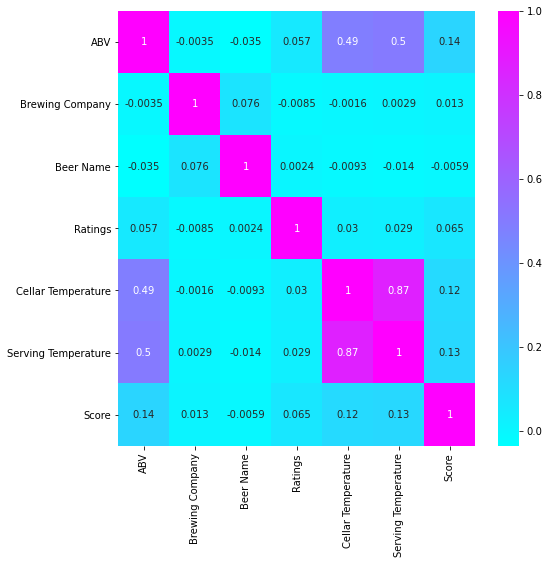

In [100]:
#correlation matrix
f, ax = plt.subplots(1, 1, figsize=(8, 8))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

In [101]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
    sns.distplot(data,kde=False,color='c',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

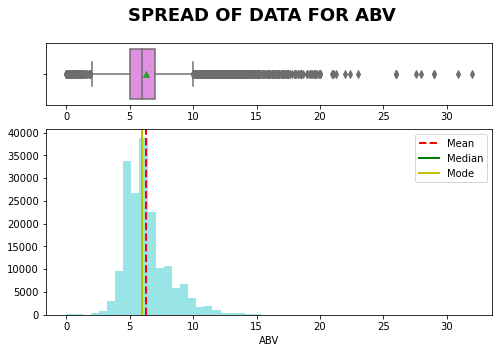

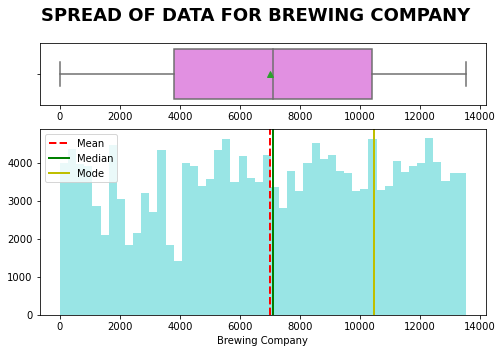

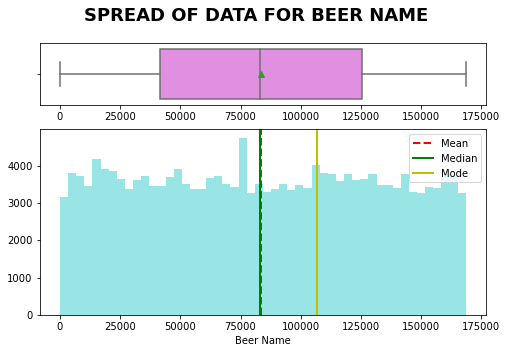

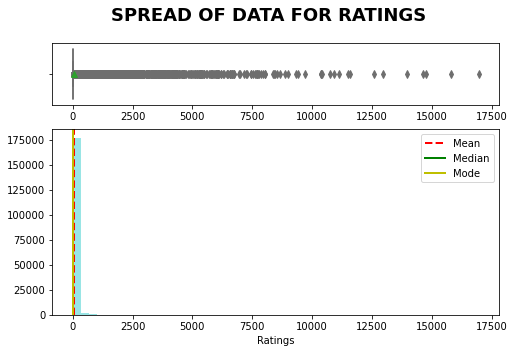

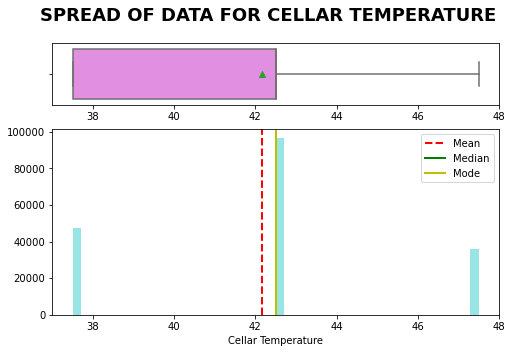

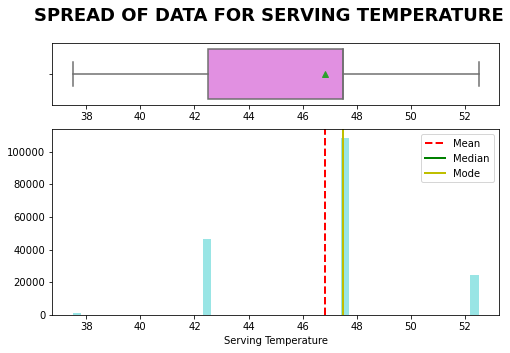

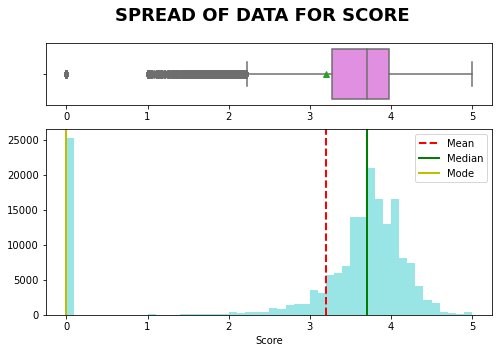

In [102]:
#select all quantitative columns for checking the spread
list_col=  df.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

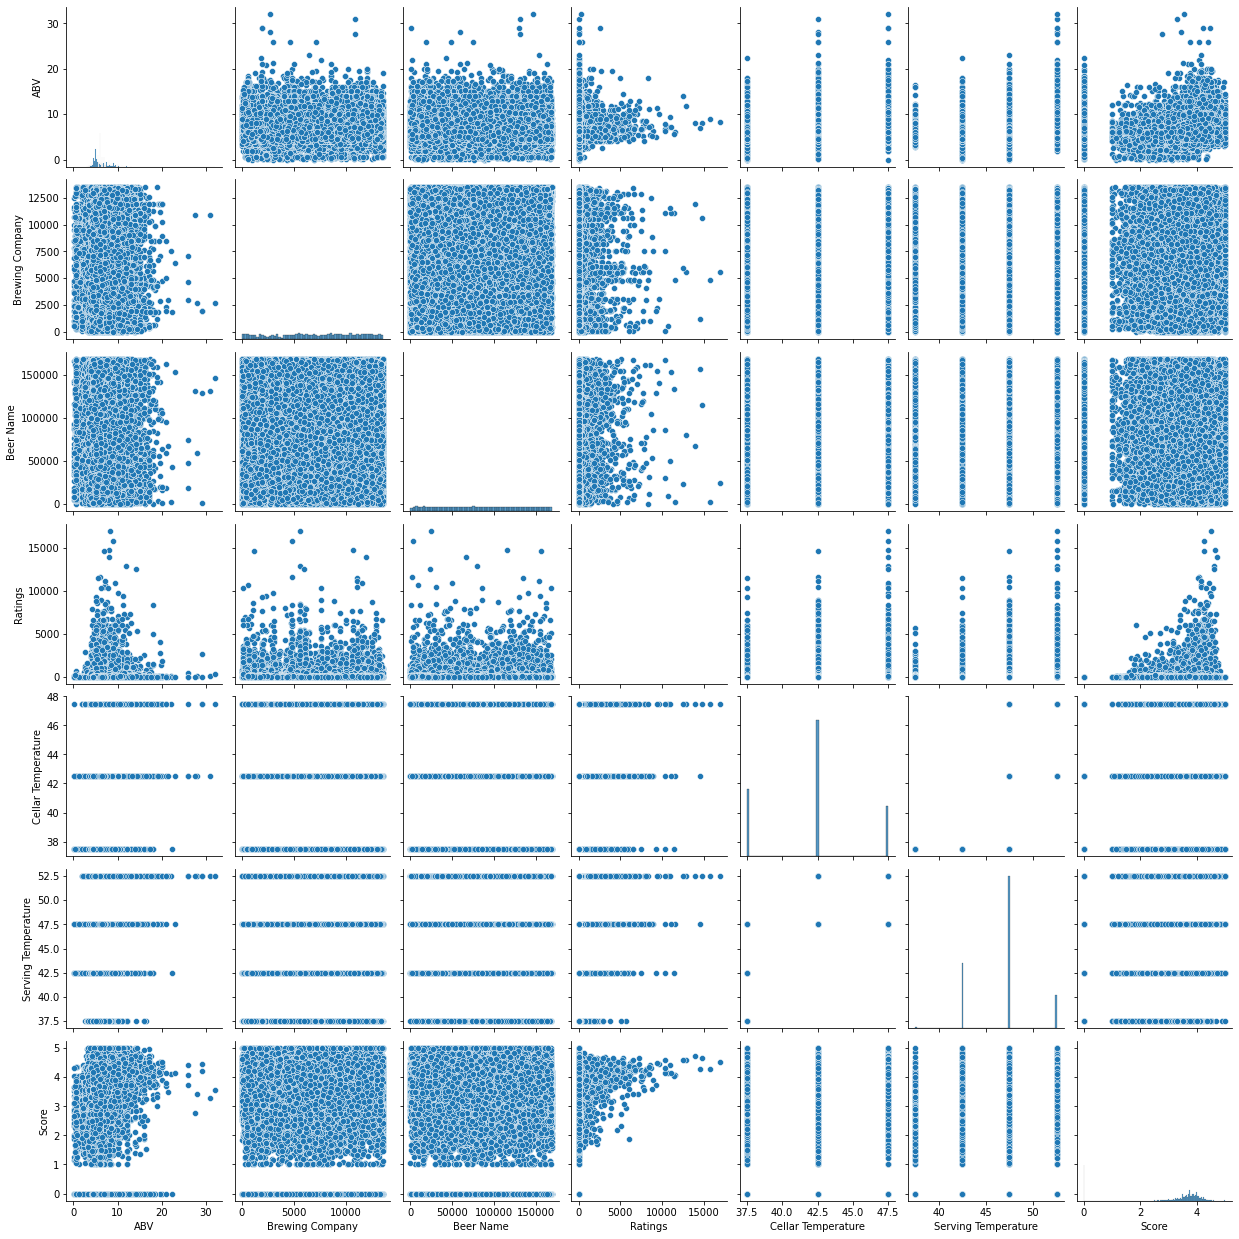

In [103]:
#scatter plots for each feature
sns.pairplot(df, kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

### Feature : Score (Target Variable)

Text(0.5, 1.0, 'Distribution of Score')

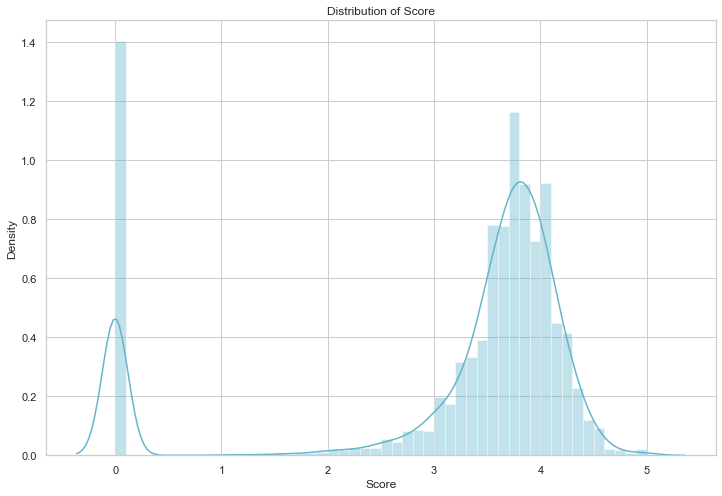

In [104]:
#density histogramm with the best fit line on it
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['Score'], kde = True, color = 'c')
plt.title('Distribution of Score')

In [105]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=df.mean()
    median=df.median()
    mode=df.mode().tolist()[0]
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=df,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
    sns.distplot(df,kde=False,color='c',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [106]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [107]:
out_iqr(df,'Score')

The IQR is 0.7000000000000002
The lower bound value is 2.2199999999999998
The upper bound value is 5.0200000000000005
Total number of outliers are 26866


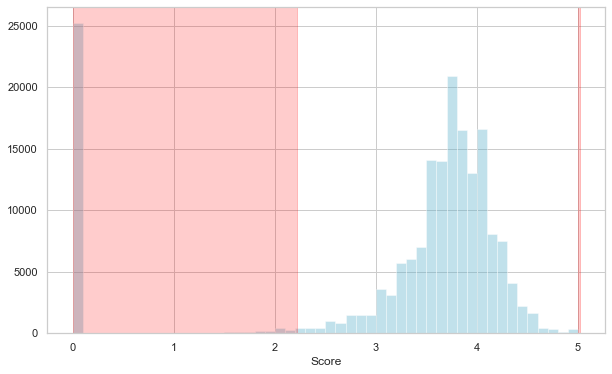

In [108]:
#plot the frequency histogram of the feature with red regions for the out IQR region
plt.figure(figsize = (10,6))
sns.distplot(df.Score, kde=False,color='c')
plt.axvspan(xmin = lower,xmax= df.Score.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df.Score.max(),alpha=0.2, color='red')

In [109]:
# Skewness and Kurtosis
print("Skewness : %f" % df['Score'].skew())
print("Kurtosis : %f" % df['Score'].kurt())

Skewness : -1.711842
Kurtosis : 1.427091


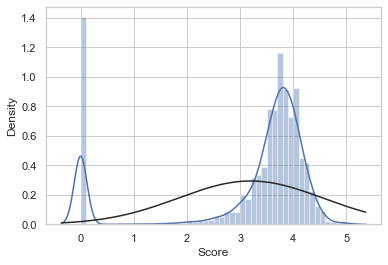

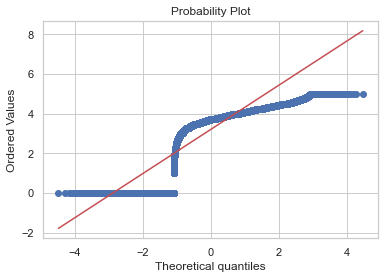

In [110]:
#check if the feature follows a normal distribution
sns.distplot(df['Score'], fit = norm)
fig = plt.figure()
res = stats.probplot(df['Score'],plot = plt)

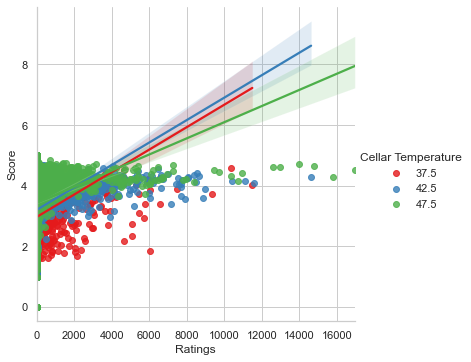

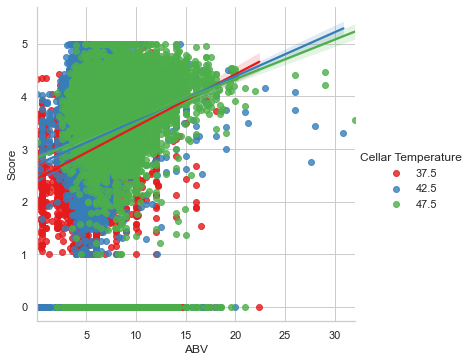

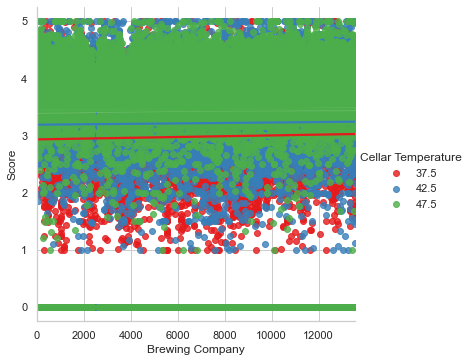

In [111]:
#scatter plot with fitted line to see the correlation between the features
ax = sns.lmplot(x = 'Ratings', y = 'Score', data=df, hue='Cellar Temperature', palette='Set1')
ax = sns.lmplot(x = 'ABV', y = 'Score', data=df, hue='Cellar Temperature', palette='Set1')
ax = sns.lmplot(x = 'Brewing Company', y = 'Score', data=df, hue='Cellar Temperature', palette='Set1')

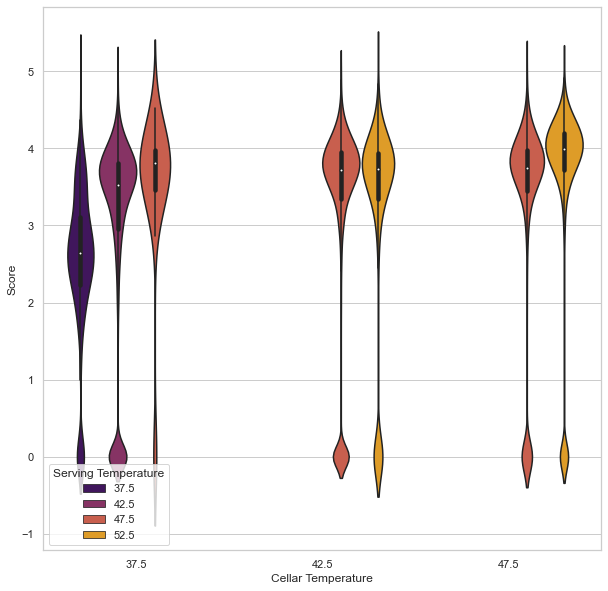

In [112]:
#violin plots for the mentioned features
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'Cellar Temperature', y = 'Score', data=df,
                 orient='v', hue='Serving Temperature', palette='inferno')

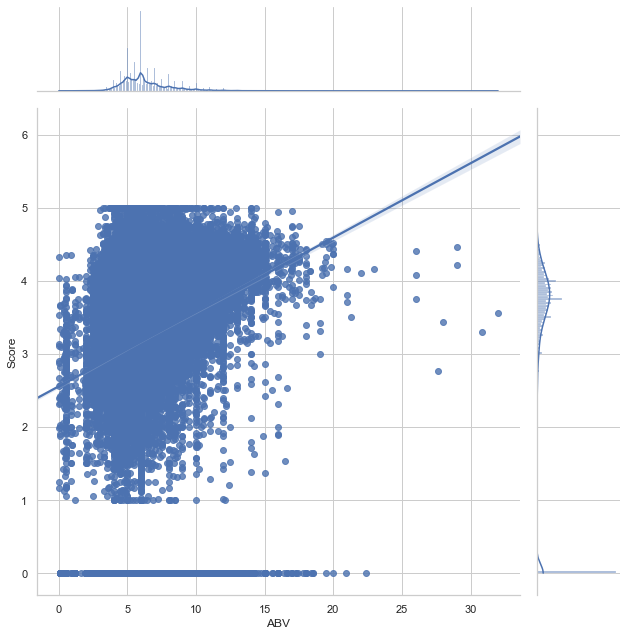

In [113]:
#scatter plot with fitted line to see the correlation betwwen the features
sns.jointplot(x="ABV", y="Score", data=df,
              kind="reg", truncate=False, height=9)

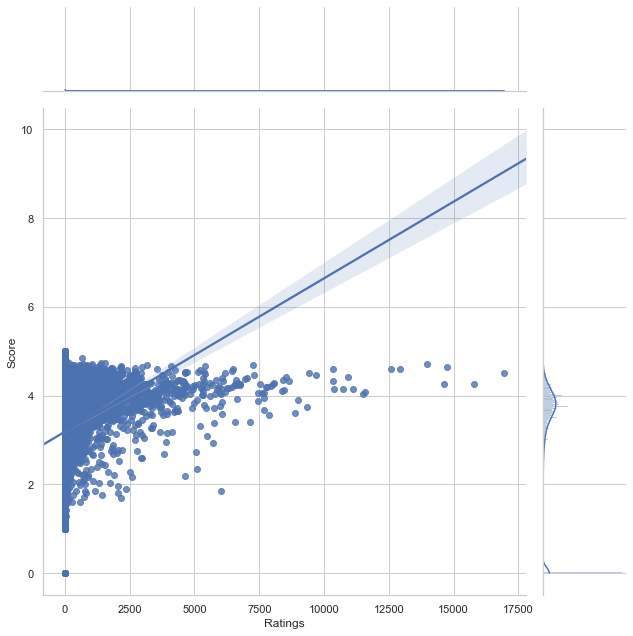

In [114]:
sns.jointplot(x="Ratings", y="Score", data=df,
              kind="reg", truncate=False, height=9)

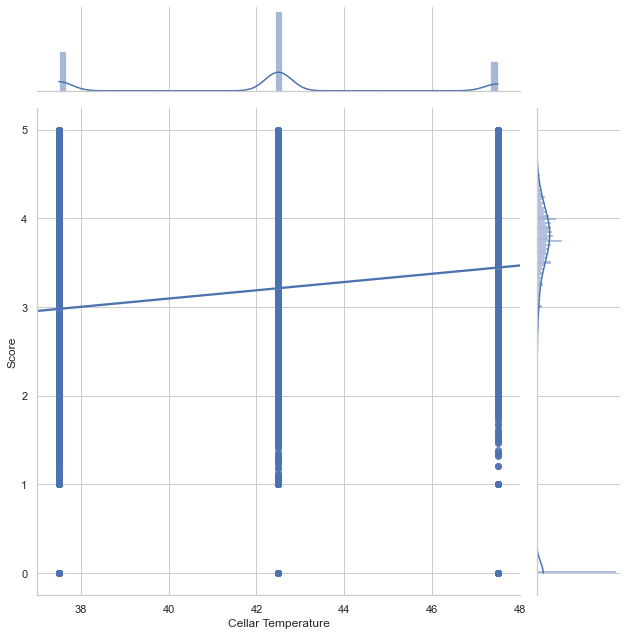

In [115]:
sns.jointplot(x="Cellar Temperature", y="Score", data=df,
              kind="reg", truncate=False, height=9)

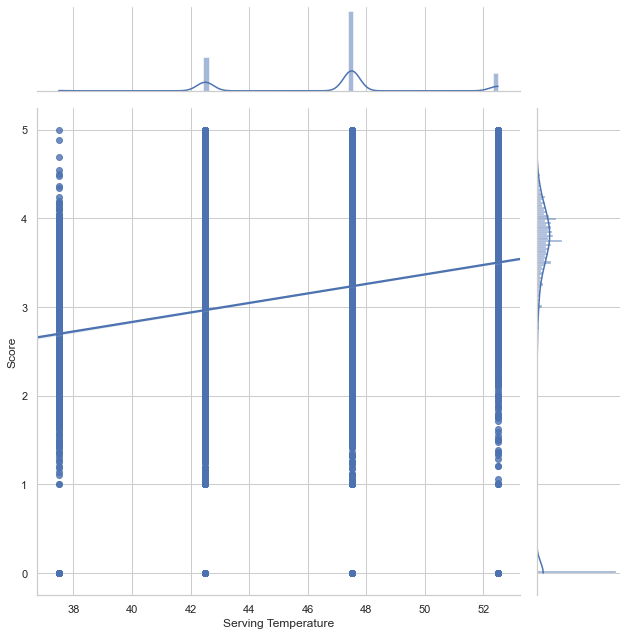

In [116]:
sns.jointplot(x="Serving Temperature", y="Score", data=df,
              kind="reg", truncate=False, height=9)

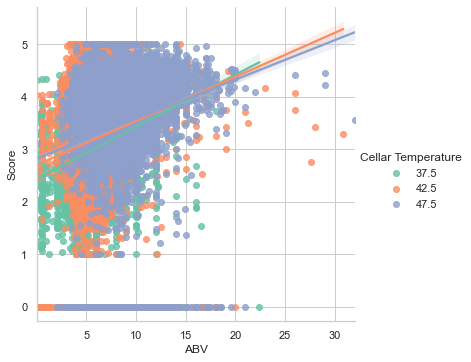

In [117]:
ax = sns.lmplot(x = 'ABV', y = 'Score', data=df, hue='Cellar Temperature', palette='Set2')


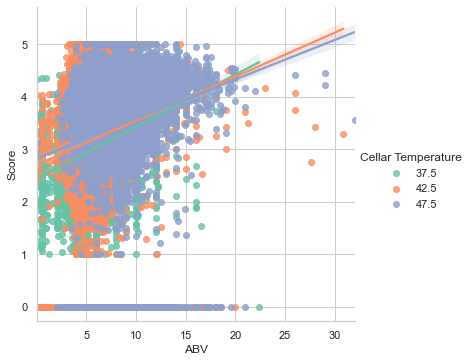

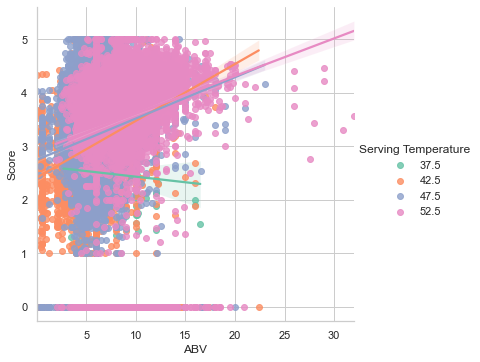

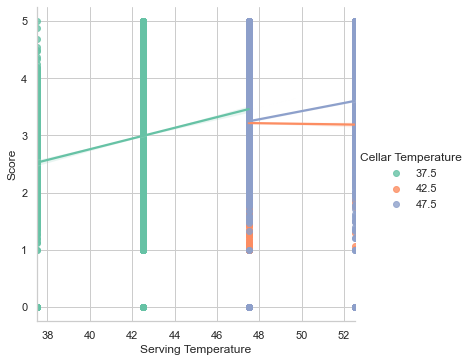

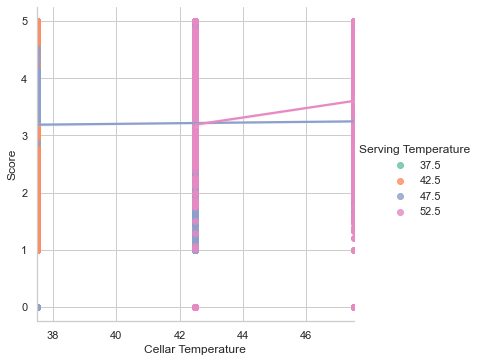

In [118]:
ax = sns.lmplot(x = 'ABV', y = 'Score', data=df, hue='Cellar Temperature', palette='Set2')
ax = sns.lmplot(x = 'ABV', y = 'Score', data=df, hue='Serving Temperature', palette='Set2')
ax = sns.lmplot(x = 'Serving Temperature', y = 'Score', data=df, hue='Cellar Temperature', palette='Set2')
ax = sns.lmplot(x = 'Cellar Temperature', y = 'Score', data=df, hue='Serving Temperature', palette='Set2')

### Feature : ABV

Text(0.5, 1.0, 'Distribution of ABV')

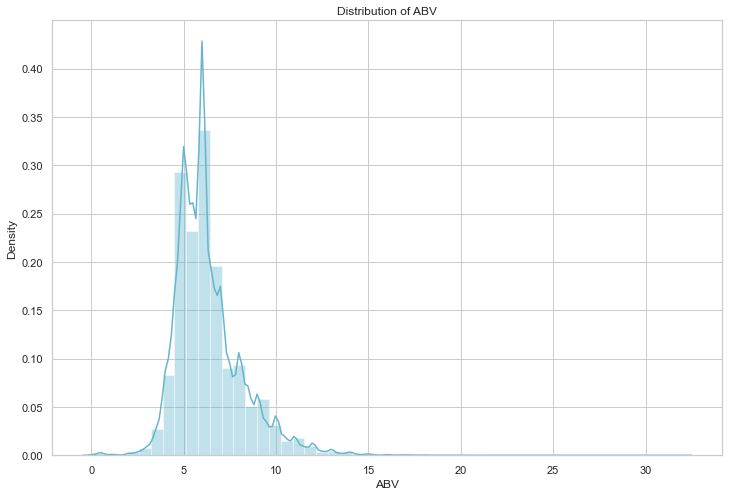

In [119]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['ABV'], kde = True, color = 'c')
plt.title('Distribution of ABV')

In [120]:
out_iqr(df,'ABV')

The IQR is 2.0
The lower bound value is 2.0
The upper bound value is 10.0
Total number of outliers are 7486


In [121]:
# Skewness and Kurtosis
print("Skewness : %f" % df['ABV'].skew())
print("Kurtosis : %f" % df['ABV'].kurt())

Skewness : 1.406881
Kurtosis : 4.495584


### Feature : Ratings

Text(0.5, 1.0, 'Distribution of Ratings')

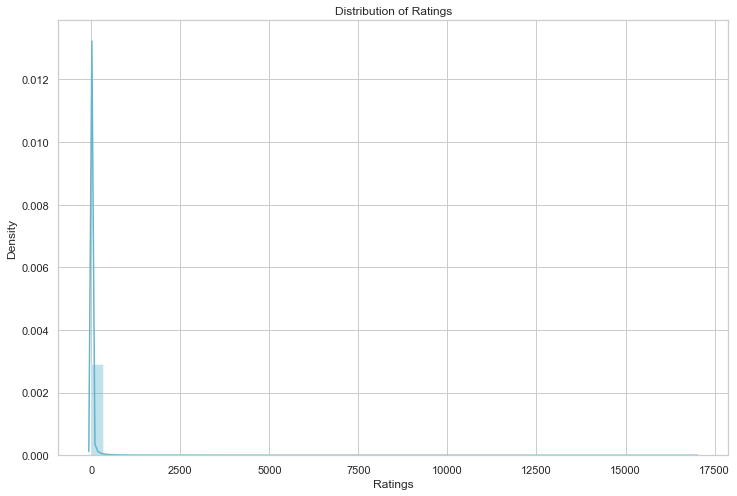

In [122]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['Ratings'], kde = True, color = 'c')
plt.title('Distribution of Ratings')

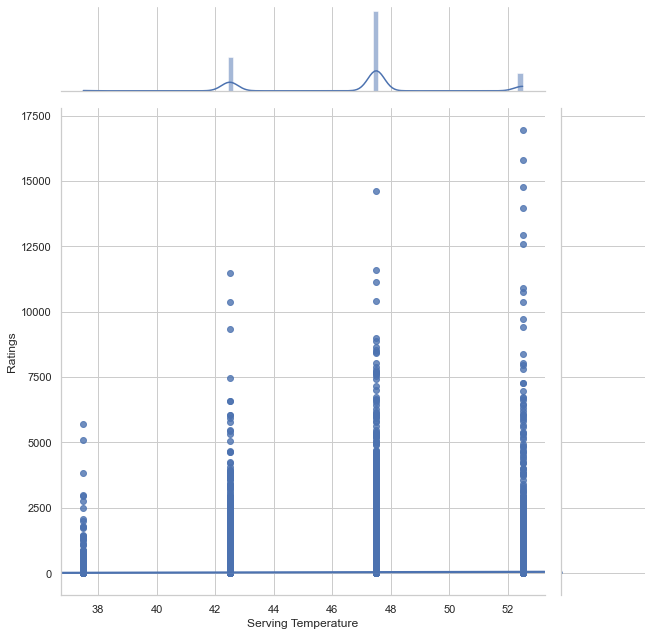

In [123]:
sns.jointplot(x="Serving Temperature", y="Ratings", data=df,
              kind="reg", truncate=False, height=9)

## Modelling

In [124]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import math

### Our model evaluation score formula range

In [125]:
# give the max score based on our error metric
score = 1/(1+np.sqrt(math.exp(np.square((3 +1) - (3 +1)).mean())))
print("Score is: ", score)

Score is:  0.5


In [126]:
#give the minimum score based on our metric
score = 1/(1+np.sqrt(math.exp(np.square((3 +1) - (20 +1)).mean())))
print("Score is: ", score)

Score is:  1.7556880978548262e-63


### Split our data to Train and Test

In [127]:
X, y = data_final.drop(['Score'], axis = 1), data_final['Score'].copy()

In [128]:
#split our dataset to 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Feature Selection





#### Selection with RandomForest

In [129]:
# give the best features for random forest algorithm
from sklearn.feature_selection import SelectFromModel

selector_rf = SelectFromModel(RandomForestRegressor(n_estimators = 100,random_state=0, n_jobs=-1), threshold = 0.001)
selector_rf.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
                threshold=0.001)

In [130]:
# print the selected features from random forest selection
selected_features_rf = X_train.columns[selector_rf.get_support()]
print("Total features selected: ",len(selected_features_rf))
print(selected_features_rf)

Total features selected:  10
Index(['ABV', 'Brewing Company', 'Beer Name', 'Ratings', 'Serving Temperature',
       'CUISINE: Not Defined', 'CUISINE: Indian', 'CUISINE: LatinAmerican',
       'GLASS: PilsenerGlass', 'Style Name_EuroPaleLager'],
      dtype='object')


In [131]:
X_train_selected_rf = X_train.loc[:,selected_features_rf]
X_test_selected_rf = X_test.loc[:, selected_features_rf]

In [132]:
#score of the random forest based on its own feature selection
est = RandomForestRegressor(random_state = 0, n_jobs = -1)
est.fit(X_train_selected_rf, y_train)
y_pred = est.predict(X_test_selected_rf)

score = 1/(1+np.sqrt(math.exp(np.square((y_pred +1) - (y_test +1)).mean())))
print("Score is: ", score)

Score is:  0.4828471387887325


#### Selection with GradientBoosting

In [133]:
#featuree selection based on gradient boosting
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

selector_gb = SelectFromModel(GradientBoostingRegressor(random_state=0), threshold = 0.001)
selector_gb.fit(X_train, y_train)

SelectFromModel(estimator=GradientBoostingRegressor(random_state=0),
                threshold=0.001)

In [134]:
#defined what features selected through gradient boosting selector
selected_features_gb = X_train.columns[selector_gb.get_support()]
print("Total features selected: ",len(selected_features_gb))
print(selected_features_gb)

Total features selected:  6
Index(['ABV', 'Ratings', 'Serving Temperature', 'CUISINE: Indian',
       'GLASS: PilsenerGlass', 'Style Name_EuroPaleLager'],
      dtype='object')


In [135]:
#produce the new train and test based on gradient boosting selection
X_train_selected_gb = X_train.loc[:,selected_features_gb]
X_test_selected_gb = X_test.loc[:, selected_features_gb]

In [136]:
#gradient boosting algorithm based on the selected features with default hyperparamater
est = GradientBoostingRegressor(random_state = 0)
est.fit(X_train_selected_gb, y_train)
y_pred = est.predict(X_test_selected_gb)

score = 1/(1+np.sqrt(math.exp(np.square((y_pred +1) - (y_test +1)).mean())))
print("Score is: ", score)

Score is:  0.4827969955176082


### Model (1) : RandomForest Regressor

In [137]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

#### Default hyperparameter (all the features)

In [138]:
est = RandomForestRegressor(random_state = 0, n_jobs = -1)
est.fit(X_train, y_train)
y_pred = est.predict(X_test)

score = 1/(1+np.sqrt(math.exp(np.square((y_pred +1) - (y_test +1)).mean())))
print("Score is: ", score)

Score is:  0.4834534020282728


#### RandomForest Selection features with default hyperparameters

In [139]:
est = RandomForestRegressor(random_state = 0, n_jobs = -1)
est.fit(X_train_selected_rf, y_train)
y_pred = est.predict(X_test_selected_rf)

score = 1/(1+np.sqrt(math.exp(np.square((y_pred +1) - (y_test +1)).mean())))
print("Score is: ", score)

Score is:  0.4828471387887325


#### GridSearchCV on RandomForest (features selected random forest) 

we face a huge computenional cost when we attend to run the gridsearch with alla the hyperparamaters because of the big amount of observations we have. so we make custom gridsearch where we set the best hyperparamateres with specific amount. in order after we some attemps to get the comverge of the gridsearch to the best predefined amount for the hyperparamaters. as follows you see the final result where gridsearch converge to the middle amaount for each hyperparamater. extra explanation in the report.

As you see the gridsearch we put it as note because they want a lot time to run. the result for each follows in a text cell after each code cell respictevely.

In [140]:

# from sklearn.model_selection import GridSearchCV

# grid_parms = {
#               'max_depth': [16, 18, 20],
#               'min_samples_leaf': [7, 9, 11]
# }



# est = RandomForestRegressor(random_state=0)

# grid = GridSearchCV(est, grid_parms, verbose = 10, n_jobs = -1)



In [141]:
# grid.fit(X_train_selected_rf, y_train)
# grid.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'max_depth': 18, 'min_samples_leaf': 9}

In [142]:
# est_new = RandomForestRegressor(random_state=0)
# est_new.set_params(**grid.best_params_, random_state=0)


RandomForestRegressor(max_depth=18, min_samples_leaf=9, random_state=0)

In [143]:
# est_new.fit(X_train_selected_rf, y_train)
# y_pred = est_new.predict(X_test_selected_rf)

# score = 1/(1+np.sqrt(math.exp(np.square((y_pred +1) - (y_test +1)).mean())))
# print("Score is: ", score)

Score is:  0.48354036196926115

#### GradientBoosting Selection features with default hyperparameters

In [144]:
est = RandomForestRegressor(random_state = 0, n_jobs = -1)
est.fit(X_train_selected_gb, y_train)
y_pred = est.predict(X_test_selected_gb)

score = 1/(1+np.sqrt(math.exp(np.square((y_pred +1) - (y_test +1)).mean())))
print("Score is: ", score)

Score is:  0.4818564103680613


#### GridSearchCV on RandomForest (features selected gradient boosting) 

In [145]:
# from sklearn.model_selection import GridSearchCV

# grid_parms = {
#               'max_depth': [8, 10, 12],
#               'min_samples_leaf': [12, 20, 22]
# }



# est = RandomForestRegressor(random_state=0)

# grid = GridSearchCV(est, grid_parms, verbose = 10, n_jobs = -1)

In [146]:
# grid.fit(X_train_selected_gb, y_train)
# grid.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'max_depth': 10, 'min_samples_leaf': 22}

In [147]:
# est_new = RandomForestRegressor(random_state=0)
# est_new.set_params(**grid.best_params_, random_state=0)


RandomForestRegressor(max_depth=10, min_samples_leaf=22, random_state=0)

In [148]:

# est_new.fit(X_train_selected_gb, y_train)
# y_pred = est_new.predict(X_test_selected_gb)

# score = 1/(1+np.sqrt(math.exp(np.square((y_pred +1) - (y_test +1)).mean())))
# print("Score is: ", score)

Score is:  0.4829111259581451

In [149]:
# from sklearn.model_selection import GridSearchCV

# grid_parms = {
#                'max_depth': [8, 10, 12],
#                'min_samples_leaf': [12, 24, 26]
# }
# est = RandomForestRegressor(random_state=0)

# grid = GridSearchCV(est, grid_parms, verbose = 10, n_jobs = -1)

In [150]:
# grid.fit(X_train_selected_gb, y_train)
# grid.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'max_depth': 10, 'min_samples_leaf': 24}

In [151]:
# est_new = RandomForestRegressor(random_state=0)
# est_new.set_params(**grid.best_params_, random_state=0)

RandomForestRegressor(max_depth=10, min_samples_leaf=24, random_state=0)

In [152]:
# est_new.fit(X_train_selected_gb, y_train)
# y_pred = est_new.predict(X_test_selected_gb)

# score = 1/(1+np.sqrt(math.exp(np.square((y_pred +1) - (y_test +1)).mean())))
# print("Score is: ", score)

Score is:  0.48291179408894264

#### Best model on Random Forest

In [153]:
est_best = RandomForestRegressor(max_depth=18, min_samples_leaf=9, random_state=0)
est_best.fit(X_train, y_train)

y_pred = est_best.predict(X_test)
score = 1/(1+np.sqrt(math.exp(np.square((y_pred +1) - (y_test +1)).mean())))
print("Score is: ", score)

Score is:  0.4841791941118327


### Model (2) : ExtraTree Regressor

####  Default hyperparameters (all the features)

In [154]:
est = ExtraTreesRegressor(random_state = 0, n_jobs = -1)
est.fit(X_train, y_train)

y_pred = est.predict(X_test)

score = 1/(1+np.sqrt(math.exp(np.square((y_pred +1) - (y_test +1)).mean())))
print("Score is: ", score)

Score is:  0.478134929148228


#### RandomForest Selection features with default hyperparameters

In [155]:
est = ExtraTreesRegressor(random_state = 0, n_jobs = -1)
est.fit(X_train_selected_rf, y_train)

y_pred = est.predict(X_test_selected_rf)

score = 1/(1+np.sqrt(math.exp(np.square((y_pred +1) - (y_test +1)).mean())))
print("Score is: ", score)

Score is:  0.47851432779425246


#### GradientBoosting Selection features with default hyperparameters

In [156]:
est = ExtraTreesRegressor(random_state = 0, n_jobs = -1)
est.fit(X_train_selected_gb, y_train)
y_pred = est.predict(X_test_selected_gb)

score = 1/(1+np.sqrt(math.exp(np.square((y_pred +1) - (y_test +1)).mean())))
print("Score is: ", score)

Score is:  0.4812155734881777


Score is:  0.48127897239124123

### Model (3) : AdaBoostRegressor

In [157]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

#### Default Hyperparameters (all the features)

In [158]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

est = AdaBoostRegressor(random_state=0)
est.fit(X_train, y_train)
y_pred = est.predict(X_test)

score = 1/(1+np.sqrt(math.exp(np.square((y_pred +1) - (y_test +1)).mean())))
print("Score is: ", score)

Score is:  0.47817844114280106


#### Random forest feature Selection features with default hyperparameters

In [159]:

from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

est = AdaBoostRegressor(random_state=0)
est.fit(X_train_selected_rf, y_train)
y_pred = est.predict(X_test_selected_rf)

score = 1/(1+np.sqrt(math.exp(np.square((y_pred +1) - (y_test +1)).mean())))
print("Score is: ", score)


Score is:  0.47829470493424847


#### Gradient boosting feature Selection with default hyperparameters

In [160]:

from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

est = AdaBoostRegressor(random_state=0)
est.fit(X_train_selected_gb, y_train)
y_pred = est.predict(X_test_selected_gb)

score = 1/(1+np.sqrt(math.exp(np.square((y_pred +1) - (y_test +1)).mean())))
print("Score is: ", score)

Score is:  0.4780422598340234


### Model (4) : GradientBoostingRegressor

In [161]:
from sklearn.ensemble import GradientBoostingRegressor

#### Default hyperparameter (all the features)

In [162]:
est = GradientBoostingRegressor(random_state=0)

est.fit(X_train, y_train)
y_pred = est.predict(X_test)

score = 1/(1+np.sqrt(math.exp(np.square((y_pred +1) - (y_test +1)).mean())))
print("Score is: ", score)

Score is:  0.4836839944746281


#### RandomForest Selection features with default hyperparameters

In [163]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

est = GradientBoostingRegressor(random_state=0) 
est.fit(X_train_selected_rf, y_train)
y_pred = est.predict(X_test_selected_rf)

score = 1/(1+np.sqrt(math.exp(np.square((y_pred +1) - (y_test +1)).mean())))
print("Score is: ", score)

Score is:  0.48311916960112256


#### GridSearchCV on Gradient Boosting (features selected random forest) 

In [164]:
#  from sklearn.model_selection import GridSearchCV

#  grid_parms = {
#                       'max_depth': [5, 10, 15],
#                       "learning_rate": [0.05,0.20,0.45], 
#                       'min_samples_leaf': [5, 10, 15]
#  }

# est = GradientBoostingRegressor(random_state=0)
# grid = GridSearchCV(est, grid_parms, verbose = 10, n_jobs = -1)



In [165]:
# grid.fit(X_train_selected_rf, y_train)
# grid.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'learning_rate': 0.2, 'max_depth': 10, 'min_samples_leaf': 5}

In [166]:
# est_new = GradientBoostingRegressor(random_state=0)
# est_new.set_params(**grid.best_params_, random_state=0)

GradientBoostingRegressor(learning_rate=0.2, max_depth=10, min_samples_leaf=5,
                          random_state=0)

In [167]:
# est_new.fit(X_train_selected_gb, y_train)
# y_pred = est_new.predict(X_test_selected_gb)

# score = 1/(1+np.sqrt(math.exp(np.square((y_pred +1) - (y_test +1)).mean())))
# print("Score is: ", score)

Score is:  0.4826997416587778

In [168]:
#  from sklearn.model_selection import GridSearchCV

#  grid_parms = {
#                       'max_depth': [8, 10, 12],
#                       "learning_rate": [0.1,0.20,0.3], 
#                       'min_samples_leaf': [3, 5, 7]
#  }

# est = GradientBoostingRegressor(random_state=0)
# grid = GridSearchCV(est, grid_parms, verbose = 10, n_jobs = -1)



In [169]:
# grid.fit(X_train_selected_rf, y_train)
# grid.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'learning_rate': 0.2, 'max_depth': 10, 'min_samples_leaf': 5}

In [170]:
# est_new = GradientBoostingRegressor(random_state=0)
# est_new.set_params(**grid.best_params_, random_state=0)

GradientBoostingRegressor(learning_rate=0.2, max_depth=10, min_samples_leaf=5,
                          random_state=0)

In [171]:
# est_new.fit(X_train_selected_gb, y_train)
# y_pred = est_new.predict(X_test_selected_gb)

# score = 1/(1+np.sqrt(math.exp(np.square((y_pred +1) - (y_test +1)).mean())))
# print("Score is: ", score)

Score is:  0.4826997416587778

#### GradientBoosting Selection features with default hyperparameters

In [172]:
est = GradientBoostingRegressor(random_state = 0)
est.fit(X_train_selected_gb, y_train)
y_pred = est.predict(X_test_selected_gb)

score = 1/(1+np.sqrt(math.exp(np.square((y_pred +1) - (y_test +1)).mean())))
print("Score is: ", score)

Score is:  0.4827969955176082


#### GridSearchCV on Gradient boosting (features selected gradient boosting) 

In [173]:
# from sklearn.model_selection import GridSearchCV

# grid_parms= {
#                      'max_depth': [7, 9, 11],
#                      "learning_rate": [0.03,0.05,0.1], 
#                      'min_samples_leaf': [9, 10,11]
# }
# est = GradientBoostingRegressor(random_state=0)

# grid = GridSearchCV(est, grid_parms, verbose = 10, n_jobs = -1)



In [174]:
# grid.fit(X_train_selected_gb, y_train)
# grid.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'learning_rate': 0.05, 'max_depth': 7, 'min_samples_leaf': 11}

In [175]:
# est_new = GradientBoostingRegressor(random_state=0)
# est_new.set_params(**grid.best_params_, random_state=0)

GradientBoostingRegressor(learning_rate=0.05, max_depth=7, min_samples_leaf=11,
                          random_state=0)

In [176]:
# est_new.fit(X_train_selected_gb, y_train)
# y_pred = est_new.predict(X_test_selected_gb)

# score = 1/(1+np.sqrt(math.exp(np.square((y_pred +1) - (y_test +1)).mean())))
# print("Score is: ", score)

Score is:  0.4831074898821568

In [177]:
# from sklearn.model_selection import GridSearchCV

# grid_parms = {
#                      'max_depth': [5, 7, 9],
#                      "learning_rate": [0.03,0.07,0.09], 
#                      'min_samples_leaf': [10, 11,12]
# }

# est = GradientBoostingRegressor(random_state=0)

# grid = GridSearchCV(est, grid_parms, verbose = 10, n_jobs = -1)



In [178]:
# grid.fit(X_train_selected_gb, y_train)
# grid.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'learning_rate': 0.07, 'max_depth': 7, 'min_samples_leaf': 11}

In [179]:
# est_new = GradientBoostingRegressor(random_state=0)
# est_new.set_params(**grid.best_params_, random_state=0)

GradientBoostingRegressor(learning_rate=0.07, max_depth=7, min_samples_leaf=11,
                          random_state=0)

In [180]:
# est_new.fit(X_train_selected_gb, y_train)
# y_pred = est_new.predict(X_test_selected_gb)

# score = 1/(1+np.sqrt(math.exp(np.square((y_pred +1) - (y_test +1)).mean())))
# print("Score is: ", score)

Score is:  0.4831135672623151

#### Best model on gradient boosting

Based on the gridsearch that we made on the selected feature from random forest we further examine the cases we check above and we get the final models thats follows as the best on gradient boosting

In [181]:
 est_best = GradientBoostingRegressor(max_depth=10, learning_rate=0.20, min_samples_leaf=7, random_state=0) 
 est_best.fit(X_train_selected_rf, y_train)
 y_pred = est_best.predict(X_test_selected_rf)

 score = 1/(1+np.sqrt(math.exp(np.square((y_pred +1) - (y_test +1)).mean())))
print("Score is: ", score)

Score is:  0.4846738394559711


In [182]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
est_best = GradientBoostingRegressor(max_depth=10, learning_rate=0.20, min_samples_leaf=7, random_state=0) 
est_best.fit(X_train, y_train)
y_pred = est_best.predict(X_test)

score = 1/(1+np.sqrt(math.exp(np.square((y_pred +1) - (y_test +1)).mean())))
print("Score is: ", score)

Score is:  0.4849046384820184


###Best model from all the above models from (1) to (4) 

As a result we present you the best model with the highest score based to all the cases where we examined.

a)All the features-selected features of random forest-selected features of gradient boosting

B) Grid search for identifing the paramateres based on selected features random forest and selected features gradient boosting

In [183]:
 est_best = GradientBoostingRegressor(max_depth=10, learning_rate=0.20, min_samples_leaf=7, random_state=0) 
 est_best.fit(X_train_selected_rf, y_train)
 y_pred = est_best.predict(X_test_selected_rf)

 score = 1/(1+np.sqrt(math.exp(np.square((y_pred +1) - (y_test +1)).mean())))
print("Score is: ", score)

Score is:  0.4846738394559711


### Model (5) : SVR 

we set it in a note because takes a lot time to compile. at the end of the code cell (after the algorithm ) you will se the result of the algorithm. SVR in contrast with the above algorithms works better with scaled data. so at first we scale the data and then run the algorithm with all the features

#### Scaling the data 

In [184]:
#numerical_columns.remove('Score')

In [185]:
# numerical_columns

In [186]:

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
# X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


In [187]:
# X_train

In [188]:
# from sklearn.svm import SVR

#### Default hyperparameters (all the features)

In [189]:

# est = SVR()
# est.fit(X_train, y_train)

# y_pred = est.predict(X_test)

# score = 1/(1+np.sqrt(math.exp(np.square((y_pred +1) - (y_test +1)).mean())))
# print("Score is: ", score)


Score is: 0.2748725870030699

# TEST DATASET (MACHINE HACK) 

## Data Cleaning

In [190]:
data_test = pd.DataFrame(pd.read_csv('Beer Test Data Set.csv'))

In [191]:
import numpy as np

np.array(data_test).shape

(20628, 10)

### Feature type transform

In [192]:
# transforming Cellar Temperature variable to numeric
data_test['Cellar Temperature'] = data_test['Cellar Temperature'].replace(['35-40'],'37.5')
data_test['Cellar Temperature'] = data_test['Cellar Temperature'].replace(['40-45'],'42.5')
data_test['Cellar Temperature'] = data_test['Cellar Temperature'].replace(['45-50'],'47.5')

data_test['Cellar Temperature'] = data_test['Cellar Temperature'].astype(float)

In [193]:
# transforming Serving Temperature variable to numeric
data_test['Serving Temperature'] = data_test['Serving Temperature'].replace(['35-40'],'37.5')
data_test['Serving Temperature'] = data_test['Serving Temperature'].replace(['40-45'],'42.5')
data_test['Serving Temperature'] = data_test['Serving Temperature'].replace(['45-50'],'47.5')
data_test['Serving Temperature'] = data_test['Serving Temperature'].replace(['50-55'],'52.5')

data_test['Serving Temperature'] = data_test['Serving Temperature'].astype(float)

In [194]:
## transforming Ratings variable to numeric
data_test["Ratings"] = data_test["Ratings"].str.replace(',','')

data_test['Ratings'] = data_test['Ratings'].astype(float)

In [195]:
# checking the changes from above
data_test.dtypes

ABV                    float64
Brewing Company          int64
Food Paring             object
Glassware Used          object
Beer Name                int64
Ratings                float64
Style Name              object
Cellar Temperature     float64
Serving Temperature    float64
Score                  float64
dtype: object

### Handling the Missing Values

In [196]:
#Check for Missing Values
data_test.isnull().sum()

ABV                     1664
Brewing Company            0
Food Paring                0
Glassware Used             0
Beer Name                  0
Ratings                    0
Style Name                 0
Cellar Temperature       755
Serving Temperature       21
Score                  20628
dtype: int64

In [197]:
# data missing values (in percent)
data_missing_test = (data_test.isnull().sum() / len(data_test)).sort_values(ascending = False)
data_missing_test

Score                  1.000000
ABV                    0.080667
Cellar Temperature     0.036601
Serving Temperature    0.001018
Brewing Company        0.000000
Food Paring            0.000000
Glassware Used         0.000000
Beer Name              0.000000
Ratings                0.000000
Style Name             0.000000
dtype: float64

In [198]:
# fill missing values of ABV with median
data_test['ABV'].fillna(data_test['ABV'].median(), inplace=True)

In [199]:
data_test[data_test['ABV'].isna()]

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score


In [200]:
# fill missing values of Cellar Temperature with median
data_test['Cellar Temperature'].fillna(data_test['Cellar Temperature'].median(), inplace=True)

In [201]:
# fill missing values of Serving Temperature with median
data_test['Serving Temperature'].fillna(data_test['Serving Temperature'].median(), inplace=True)

In [202]:
#Check for Missing Values
data_test.isnull().sum()

ABV                        0
Brewing Company            0
Food Paring                0
Glassware Used             0
Beer Name                  0
Ratings                    0
Style Name                 0
Cellar Temperature         0
Serving Temperature        0
Score                  20628
dtype: int64

### Investigate our feature Behavior

In [203]:
data_test['Glassware Used'].value_counts()

#we can see 21 observations with 'None,yet'

PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel,Stein)                           10141
Snifter,Tulip,OversizedWineGlass                                                 1681
PintGlass(orBecker,Nonic,Tumbler),Tulip,OversizedWineGlass                        998
PintGlass(orBecker,Nonic,Tumbler),Snifter,OversizedWineGlass                      646
PilsenerGlass(orPokal)                                                            640
Flute,Tulip,OversizedWineGlass                                                    614
PintGlass(orBecker,Nonic,Tumbler),PilsenerGlass(orPokal),Mug(orSeidel,Stein)      579
WeizenGlass                                                                       528
Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein)                                  521
Flute,PilsenerGlass(orPokal)                                                      473
PintGlass(orBecker,Nonic,Tumbler)                                                 433
Stange(SlenderCylinder)                               

In [204]:
data_test['Food Paring'].value_counts()

(Curried,Thai)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar,pungentGorgonzola,Limburger)Meat(Poultry,Fish,Shellfish,Salmon)                           2842
(PanAsian)Cheese(earthyCamembert,Fontina,nuttyAsiago,Colby,Parmesan,tangyBrick,Edam,Feta)General(Salad)Meat(Poultry)                                       1405
(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swiss)General(Chocolate,Dessert)Meat(Beef,SmokedMeat,GrilledMeat)                                               1332
(Barbecue)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar,pungentGorgonzola,Limburger)Meat(Game,GrilledMeat,Salmon)                                     1127
(Curried,Thai)Cheese(earthyCamembert,Fontina,nuttyAsiago,Colby,Parmesan,pungentGorgonzola,Limburger)General(Salad,Aperitif)Meat(Poultry,Fish,Shellfish)     998
                                                                                                                                                           ... 
(German)Cheese(butteryBrie,Gouda,Havarti

In [205]:
# we see what style of beers has 'None,yet' in Food Pairing column
grouped_food_test = data_test.groupby('Food Paring')['Style Name'].value_counts()
grouped_food_test = pd.DataFrame(grouped_food_test)
grouped_food_test

Style Name
Food Paring                                        Style Name                         
(Aperitif)Meat(Fish,Shellfish,Salmon)              BiredeChampagneBireBrut           6
(Aperitif,Digestive)Meat(Game,Salmon)              BelgianStrongPaleAle            158
(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swis... AmericanPorter                 1332
(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swis... AmericanStout                   546
(Barbecue)Cheese(earthyCamembert,Fontina)Meat(B... BalticPorter                     88
...                                                                                ...
None,yet                                           CreamAle                        161
                                                   ScottishAle                     112
                                                   LowAlcoholBeer                   49
                                                   Kvass                            21
                                                   BlackTan                          8

[94 rows x 1 columns]

In [206]:
# blacktans beers do not have food pairing
data_test[data_test['Style Name'] == 'BlackTan']

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
402,5.0,3298,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",121642,1.0,BlackTan,42.5,47.5,NaN
3617,5.0,8571,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",97464,1216.0,BlackTan,42.5,47.5,NaN
4833,6.0,11168,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",136318,6.0,BlackTan,42.5,47.5,NaN
7719,6.3,1239,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",132794,7.0,BlackTan,42.5,47.5,NaN
13482,6.3,1239,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",132793,277.0,BlackTan,42.5,47.5,NaN
18539,6.0,12176,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",130408,3.0,BlackTan,42.5,47.5,NaN
19768,6.0,12464,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",32392,1.0,BlackTan,42.5,47.5,NaN
20058,5.0,5613,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",157236,5.0,BlackTan,42.5,47.5,NaN


In [207]:
# Kvass beers do not have Food Pairing & Glassware Used
data_test[data_test['Style Name'] == 'Kvass'].head()

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
634,6.0,9786,"None,yet","None,yet",83718,12.0,Kvass,42.5,47.5,NaN
2979,6.0,6174,"None,yet","None,yet",64336,4.0,Kvass,42.5,47.5,NaN
2997,1.5,8621,"None,yet","None,yet",98259,27.0,Kvass,42.5,47.5,NaN
3278,6.0,4599,"None,yet","None,yet",40483,10.0,Kvass,42.5,47.5,NaN
4101,0.2,7796,"None,yet","None,yet",88392,2.0,Kvass,42.5,47.5,NaN


In [208]:
# checking for both Cellar & Serving Temperature columns if they have missing values on Kvass beers
sub_kvass_test = data_test[data_test['Style Name'] == 'Kvass']
print("NaN in Cellar Temperature: ", sub_kvass_test['Cellar Temperature'].isna().sum())
print("NaN in Serving Temperature: ", sub_kvass_test['Serving Temperature'].isna().sum())

NaN in Cellar Temperature:  0
NaN in Serving Temperature:  0


In [209]:
data_test[data_test['Style Name'] == 'LowAlcoholBeer'].head()

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
308,6.0,10413,"None,yet","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",100596,1.0,LowAlcoholBeer,37.5,42.5,NaN
807,0.5,13357,"None,yet","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",79876,1.0,LowAlcoholBeer,37.5,42.5,NaN
1081,0.4,8944,"None,yet","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",103243,3.0,LowAlcoholBeer,37.5,42.5,NaN
2249,6.0,5426,"None,yet","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",156765,0.0,LowAlcoholBeer,37.5,42.5,NaN
2935,2.9,2376,"None,yet","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",43430,1.0,LowAlcoholBeer,37.5,42.5,NaN


In [210]:
data_test[data_test['Style Name'] == 'ScottishAle'].head()

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
336,6.0,9645,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",28015,1.0,ScottishAle,42.5,47.5,NaN
688,7.8,2656,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",2207,210.0,ScottishAle,42.5,47.5,NaN
707,6.0,9344,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",142660,0.0,ScottishAle,42.5,47.5,NaN
1120,4.5,4481,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",95091,3.0,ScottishAle,42.5,47.5,NaN
1358,7.9,10078,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",105641,3.0,ScottishAle,42.5,47.5,NaN


In [211]:
data_test[data_test['Style Name'] == 'CreamAle'].head()

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
173,6.2,2807,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",156059,5.0,CreamAle,37.5,42.5,NaN
196,5.2,9185,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",86332,1.0,CreamAle,37.5,42.5,NaN
401,5.7,969,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",37058,37.0,CreamAle,37.5,42.5,NaN
444,5.2,13312,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",38253,1.0,CreamAle,37.5,42.5,NaN
550,5.4,11563,"None,yet","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",142576,2.0,CreamAle,37.5,42.5,NaN


In [212]:
data_test.head()

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
0,6.2,8803,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",34558,3.0,AmericanIPA,42.5,47.5,NaN
1,5.3,8558,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",86826,20.0,AmericanPorter,42.5,47.5,NaN
2,7.0,7519,"Cheese(earthyCamembert,Fontina)General(Aperitif)","Snifter,Tulip,OversizedWineGlass",17051,0.0,BelgianDarkAle,47.5,47.5,NaN
3,5.2,9852,"(LatinAmerican,German)Meat(Pork,Poultry)","Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein)",49156,2.0,ViennaLager,37.5,42.5,NaN
4,8.1,8991,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",162723,5.0,AmericanPorter,42.5,47.5,NaN


In [213]:
data_test['Food Paring'].value_counts()

(Curried,Thai)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar,pungentGorgonzola,Limburger)Meat(Poultry,Fish,Shellfish,Salmon)                           2842
(PanAsian)Cheese(earthyCamembert,Fontina,nuttyAsiago,Colby,Parmesan,tangyBrick,Edam,Feta)General(Salad)Meat(Poultry)                                       1405
(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swiss)General(Chocolate,Dessert)Meat(Beef,SmokedMeat,GrilledMeat)                                               1332
(Barbecue)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar,pungentGorgonzola,Limburger)Meat(Game,GrilledMeat,Salmon)                                     1127
(Curried,Thai)Cheese(earthyCamembert,Fontina,nuttyAsiago,Colby,Parmesan,pungentGorgonzola,Limburger)General(Salad,Aperitif)Meat(Poultry,Fish,Shellfish)     998
                                                                                                                                                           ... 
(German)Cheese(butteryBrie,Gouda,Havarti

In [214]:
# replace rows with 'None,yet' with the most frequent value in Food Pairing
data_test['Food Paring'] = data_test['Food Paring'].apply(lambda x: 'Curried,Thai)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar,pungentGorgonzola,Limburger)Meat(Poultry,Fish,Shellfish,Salmon)' if ('None,yet') in x else x)

In [215]:
data_test[data_test['Food Paring'] == 'None,yet'] 

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score


In [216]:
data_test[data_test['Glassware Used'] == 'None,yet'].head()

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
634,6.0,9786,"Curried,Thai)Cheese(pepperyMontereyPepperJack,...","None,yet",83718,12.0,Kvass,42.5,47.5,NaN
2979,6.0,6174,"Curried,Thai)Cheese(pepperyMontereyPepperJack,...","None,yet",64336,4.0,Kvass,42.5,47.5,NaN
2997,1.5,8621,"Curried,Thai)Cheese(pepperyMontereyPepperJack,...","None,yet",98259,27.0,Kvass,42.5,47.5,NaN
3278,6.0,4599,"Curried,Thai)Cheese(pepperyMontereyPepperJack,...","None,yet",40483,10.0,Kvass,42.5,47.5,NaN
4101,0.2,7796,"Curried,Thai)Cheese(pepperyMontereyPepperJack,...","None,yet",88392,2.0,Kvass,42.5,47.5,NaN


In [217]:
# replace rows with 'None,yet' with the most frequent value in Food Pairing
data_test['Glassware Used'] = data_test['Glassware Used'].apply(lambda x: 'PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel,Stein)' if ('None,yet') in x else x)

In [218]:
data_test[data_test['Glassware Used'] == 'None,yet'] 

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score


In [219]:
# checking Glassware Used with Style Name
grouped_glass_test = data_test.groupby('Glassware Used')['Style Name'].value_counts()
grouped_glass_test = pd.DataFrame(grouped_glass_test)
grouped_glass_test

Style Name
Glassware Used                             Style Name                         
Flute                                      BiredeChampagneBireBrut           6
Flute,PilsenerGlass(orPokal)               MunichHellesLager               123
                                           Schwarzbier                     116
                                           EuroStrongLager                  93
                                           MunichDunkelLager                93
...                                                                        ...
Tulip,Goblet(orChalice),OversizedWineGlass BelgianIPA                      130
Tulip,OversizedWineGlass                   BiredeGarde                      70
WeizenGlass                                Hefeweizen                      408
                                           Dunkelweizen                    102
                                           Kristalweizen                    18

[94 rows x 1 columns]

In [220]:
data_test['Glassware Used'].value_counts()

PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel,Stein)                           10162
Snifter,Tulip,OversizedWineGlass                                                 1681
PintGlass(orBecker,Nonic,Tumbler),Tulip,OversizedWineGlass                        998
PintGlass(orBecker,Nonic,Tumbler),Snifter,OversizedWineGlass                      646
PilsenerGlass(orPokal)                                                            640
Flute,Tulip,OversizedWineGlass                                                    614
PintGlass(orBecker,Nonic,Tumbler),PilsenerGlass(orPokal),Mug(orSeidel,Stein)      579
WeizenGlass                                                                       528
Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein)                                  521
Flute,PilsenerGlass(orPokal)                                                      473
PintGlass(orBecker,Nonic,Tumbler)                                                 433
Stange(SlenderCylinder)                               

In [221]:
data_test = data_test.reset_index()

In [222]:
data_test[data_test == 'None,yet'].sum()

index                  0.0
ABV                    0.0
Brewing Company        0.0
Food Paring              0
Glassware Used           0
Beer Name              0.0
Ratings                0.0
Style Name               0
Cellar Temperature     0.0
Serving Temperature    0.0
Score                  0.0
dtype: object

## Feature Engineering

### Feature : Food Paring

In [223]:
sub_paring_test  = data_test[['Food Paring']]
sub_paring_test

,Food Paring
0,"(Curried,Thai)Cheese(pepperyMontereyPepperJack..."
1,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi..."
2,"Cheese(earthyCamembert,Fontina)General(Aperitif)"
3,"(LatinAmerican,German)Meat(Pork,Poultry)"
4,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi..."
...,...
20623,"(Barbecue)Cheese(pepperyMontereyPepperJack,sha..."
20624,"(Italian,MiddleEastern)Cheese(pepperyMontereyP..."
20625,"(Aperitif,Digestive)Meat(Game,Salmon)"
20626,"Cheese(nuttyAsiago,Colby,Parmesan)General(Dige..."


In [224]:
sub_paring_test['Food Paring'][2].startswith('(')

False

In [225]:
sub_paring_test[['Food Paring']].value_counts()

Food Paring                                                                                                                                            
(Curried,Thai)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar,pungentGorgonzola,Limburger)Meat(Poultry,Fish,Shellfish,Salmon)                           2842
(PanAsian)Cheese(earthyCamembert,Fontina,nuttyAsiago,Colby,Parmesan,tangyBrick,Edam,Feta)General(Salad)Meat(Poultry)                                       1405
(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swiss)General(Chocolate,Dessert)Meat(Beef,SmokedMeat,GrilledMeat)                                               1332
(Barbecue)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar,pungentGorgonzola,Limburger)Meat(Game,GrilledMeat,Salmon)                                     1127
(Curried,Thai)Cheese(earthyCamembert,Fontina,nuttyAsiago,Colby,Parmesan,pungentGorgonzola,Limburger)General(Salad,Aperitif)Meat(Poultry,Fish,Shellfish)     998
                                                

In [226]:
sub_paring_test[sub_paring_test['Food Paring'] == 'None,yet']

,Food Paring


In [227]:
#creating new column 'Kitchen' that takes the different style of foods from Food Pairing column
## if it start with '(' you put those words into the column Kitchen in order to seperate the style of food otherwise, Unkown
sub_paring_test['Kitchen'] = np.nan

for i, obs in enumerate(sub_paring_test['Food Paring']):
  if sub_paring_test['Food Paring'][i].startswith('('):
    sub_paring_test['Kitchen'][i] = sub_paring_test['Food Paring'][i].split('(', 1)[1].split(')')[0]
  else:
    sub_paring_test['Kitchen'][i] = 'Unknown'

In [228]:
sub_paring_test

,Food Paring,Kitchen
0,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","Curried,Thai"
1,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...",Barbecue
2,"Cheese(earthyCamembert,Fontina)General(Aperitif)",Unknown
3,"(LatinAmerican,German)Meat(Pork,Poultry)","LatinAmerican,German"
4,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...",Barbecue
...,...,...
20623,"(Barbecue)Cheese(pepperyMontereyPepperJack,sha...",Barbecue
20624,"(Italian,MiddleEastern)Cheese(pepperyMontereyP...","Italian,MiddleEastern"
20625,"(Aperitif,Digestive)Meat(Game,Salmon)","Aperitif,Digestive"
20626,"Cheese(nuttyAsiago,Colby,Parmesan)General(Dige...",Unknown


In [229]:
sub_paring_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20628 entries, 0 to 20627
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Food Paring  20628 non-null  object
 1   Kitchen      20628 non-null  object
dtypes: object(2)
memory usage: 322.4+ KB


In [230]:
# now we can see the frequency of all type of foods
sub_paring_test['Kitchen'].value_counts()

Unknown                                                                                                     4730
Curried,Thai                                                                                                3840
Barbecue                                                                                                    3807
German                                                                                                      2350
PanAsian                                                                                                    1405
Salad                                                                                                        481
Italian,MiddleEastern                                                                                        471
Barbecue,LatinAmerican                                                                                       341
Japanese,German                                                                                 

In [231]:
# we put some type of foods that we discovered into one category called General. Now we have 3 main categories: Meat, Cheese, General and other different cuisines
sub_paring_test['Kitchen'] = sub_paring_test['Kitchen'].apply(lambda x: 'General' if ('Dessert,Aperitif') in x else x)
sub_paring_test['Kitchen'] = sub_paring_test['Kitchen'].apply(lambda x: 'General' if ('Chocolate,Salad,Dessert,Apritif') in x else x)
sub_paring_test['Kitchen'] = sub_paring_test['Kitchen'].apply(lambda x: 'General' if ('Aperitif') in x else x)
sub_paring_test['Kitchen'] = sub_paring_test['Kitchen'].apply(lambda x: 'General' if ('Chocolate,Salad,Dessert,Aperitif') in x else x)
sub_paring_test['Kitchen'] = sub_paring_test['Kitchen'].apply(lambda x: 'General' if ('Dessert') in x else x)
sub_paring_test['Kitchen'] = sub_paring_test['Kitchen'].apply(lambda x: 'General' if ('Aperitif,Digestive') in x else x)
sub_paring_test['Kitchen'] = sub_paring_test['Kitchen'].apply(lambda x: 'General' if ('Dessert,Aperitif,Digestive') in x else x)
sub_paring_test['Kitchen'] = sub_paring_test['Kitchen'].apply(lambda x: 'General' if ('Salad') in x else x)

In [232]:
sub_paring_test['Kitchen'].value_counts()

Unknown                                                                                                     4730
Curried,Thai                                                                                                3840
Barbecue                                                                                                    3807
German                                                                                                      2350
PanAsian                                                                                                    1405
General                                                                                                     1020
Italian,MiddleEastern                                                                                        471
Barbecue,LatinAmerican                                                                                       341
Japanese,German                                                                                 

In [233]:
sub_paring_test.tail()

,Food Paring,Kitchen
20623,"(Barbecue)Cheese(pepperyMontereyPepperJack,sha...",Barbecue
20624,"(Italian,MiddleEastern)Cheese(pepperyMontereyP...","Italian,MiddleEastern"
20625,"(Aperitif,Digestive)Meat(Game,Salmon)",General
20626,"Cheese(nuttyAsiago,Colby,Parmesan)General(Dige...",Unknown
20627,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","Curried,Thai"


In [234]:
# we modified the 3 food categories to take values 0 and 1
sub_paring_test['Cheese'] = np.nan
sub_paring_test['Meat'] = np.nan
sub_paring_test['General'] = np.nan

str_list= []

for i, obs in enumerate(sub_paring_test['Food Paring']):
  str_list = [s.split(')')[-1] for s in sub_paring_test['Food Paring'][i].split('(')]

  if('Cheese' in str_list):
      sub_paring_test['Cheese'][i] = 1
  else:
      sub_paring_test['Cheese'][i] = 0

  if('Meat' in str_list):
      sub_paring_test['Meat'][i] = 1
  else:
      sub_paring_test['Meat'][i] = 0

  if('General' in str_list):
      sub_paring_test['General'][i] = 1
  else:
      sub_paring_test['General'][i] = 0  


In [235]:
sub_paring_test.head(15)

,Food Paring,Kitchen,Cheese,Meat,General
0,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","Curried,Thai",1.0,1.0,0.0
1,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...",Barbecue,1.0,1.0,1.0
2,"Cheese(earthyCamembert,Fontina)General(Aperitif)",Unknown,1.0,0.0,1.0
3,"(LatinAmerican,German)Meat(Pork,Poultry)","LatinAmerican,German",0.0,1.0,0.0
4,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...",Barbecue,1.0,1.0,1.0
5,"(Barbecue)Cheese(pepperyMontereyPepperJack,sha...",Barbecue,1.0,1.0,0.0
6,"Cheese(butteryBrie,Gouda,Havarti,Swiss)General...",Unknown,1.0,1.0,1.0
7,"Meat(Poultry,Fish,Shellfish)",Unknown,0.0,1.0,0.0
8,"Cheese(pepperyMontereyPepperJack,pungentGorgon...",Unknown,1.0,0.0,1.0
9,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...",Barbecue,1.0,1.0,1.0


In [236]:
temp= sub_paring_test['Kitchen'].apply(lambda x: 1. if ('General') in x else 0.)
temp

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
20623    0.0
20624    0.0
20625    1.0
20626    0.0
20627    0.0
Name: Kitchen, Length: 20628, dtype: float64

In [237]:
temp_test = pd.DataFrame(temp)
to_make_ones_test = temp_test[temp_test['Kitchen'] == 1].index
to_make_ones_test

Int64Index([   10,    22,    39,    43,    62,    85,    87,   112,   165,
              166,
            ...
            20433, 20479, 20481, 20511, 20532, 20575, 20606, 20610, 20615,
            20625],
           dtype='int64', length=1020)

In [238]:
sub_paring_test

,Food Paring,Kitchen,Cheese,Meat,General
0,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","Curried,Thai",1.0,1.0,0.0
1,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...",Barbecue,1.0,1.0,1.0
2,"Cheese(earthyCamembert,Fontina)General(Aperitif)",Unknown,1.0,0.0,1.0
3,"(LatinAmerican,German)Meat(Pork,Poultry)","LatinAmerican,German",0.0,1.0,0.0
4,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...",Barbecue,1.0,1.0,1.0
...,...,...,...,...,...
20623,"(Barbecue)Cheese(pepperyMontereyPepperJack,sha...",Barbecue,1.0,1.0,0.0
20624,"(Italian,MiddleEastern)Cheese(pepperyMontereyP...","Italian,MiddleEastern",1.0,1.0,1.0
20625,"(Aperitif,Digestive)Meat(Game,Salmon)",General,0.0,1.0,0.0
20626,"Cheese(nuttyAsiago,Colby,Parmesan)General(Dige...",Unknown,1.0,0.0,1.0


In [239]:
sub_paring_test.loc[to_make_ones_test,'General'] = 1

In [240]:
sub_paring_test.head(15)

,Food Paring,Kitchen,Cheese,Meat,General
0,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","Curried,Thai",1.0,1.0,0.0
1,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...",Barbecue,1.0,1.0,1.0
2,"Cheese(earthyCamembert,Fontina)General(Aperitif)",Unknown,1.0,0.0,1.0
3,"(LatinAmerican,German)Meat(Pork,Poultry)","LatinAmerican,German",0.0,1.0,0.0
4,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...",Barbecue,1.0,1.0,1.0
5,"(Barbecue)Cheese(pepperyMontereyPepperJack,sha...",Barbecue,1.0,1.0,0.0
6,"Cheese(butteryBrie,Gouda,Havarti,Swiss)General...",Unknown,1.0,1.0,1.0
7,"Meat(Poultry,Fish,Shellfish)",Unknown,0.0,1.0,0.0
8,"Cheese(pepperyMontereyPepperJack,pungentGorgon...",Unknown,1.0,0.0,1.0
9,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...",Barbecue,1.0,1.0,1.0


In [241]:
general_indices_test = sub_paring_test[sub_paring_test['Kitchen'] == 'General'].index
general_indices_test

Int64Index([   10,    22,    39,    43,    62,    85,    87,   112,   165,
              166,
            ...
            20433, 20479, 20481, 20511, 20532, 20575, 20606, 20610, 20615,
            20625],
           dtype='int64', length=1020)

In [242]:
# see food pairings where Kitchen is 'General'
sub_paring_test.iloc[general_indices_test] 

,Food Paring,Kitchen,Cheese,Meat,General
10,(Dessert)Meat(Poultry),General,0.0,1.0,1.0
22,(Salad),General,0.0,0.0,1.0
39,(Salad),General,0.0,0.0,1.0
43,"(Dessert,Aperitif,Digestive)",General,0.0,0.0,1.0
62,(Dessert)Meat(Poultry),General,0.0,1.0,1.0
...,...,...,...,...,...
20575,(Salad),General,0.0,0.0,1.0
20606,(Salad),General,0.0,0.0,1.0
20610,(Dessert)Meat(Poultry),General,0.0,1.0,1.0
20615,"(Dessert,Aperitif,Digestive)",General,0.0,0.0,1.0


In [243]:
sub_paring_test.loc[general_indices_test, 'Kitchen'] = 'Unknown'

In [244]:
sub_paring_test.head(15)

,Food Paring,Kitchen,Cheese,Meat,General
0,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","Curried,Thai",1.0,1.0,0.0
1,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...",Barbecue,1.0,1.0,1.0
2,"Cheese(earthyCamembert,Fontina)General(Aperitif)",Unknown,1.0,0.0,1.0
3,"(LatinAmerican,German)Meat(Pork,Poultry)","LatinAmerican,German",0.0,1.0,0.0
4,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...",Barbecue,1.0,1.0,1.0
5,"(Barbecue)Cheese(pepperyMontereyPepperJack,sha...",Barbecue,1.0,1.0,0.0
6,"Cheese(butteryBrie,Gouda,Havarti,Swiss)General...",Unknown,1.0,1.0,1.0
7,"Meat(Poultry,Fish,Shellfish)",Unknown,0.0,1.0,0.0
8,"Cheese(pepperyMontereyPepperJack,pungentGorgon...",Unknown,1.0,0.0,1.0
9,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...",Barbecue,1.0,1.0,1.0


In [245]:
# see food pairings where Kitchen is 'Unkown'
sub_paring_test.iloc[general_indices_test]

,Food Paring,Kitchen,Cheese,Meat,General
10,(Dessert)Meat(Poultry),Unknown,0.0,1.0,1.0
22,(Salad),Unknown,0.0,0.0,1.0
39,(Salad),Unknown,0.0,0.0,1.0
43,"(Dessert,Aperitif,Digestive)",Unknown,0.0,0.0,1.0
62,(Dessert)Meat(Poultry),Unknown,0.0,1.0,1.0
...,...,...,...,...,...
20575,(Salad),Unknown,0.0,0.0,1.0
20606,(Salad),Unknown,0.0,0.0,1.0
20610,(Dessert)Meat(Poultry),Unknown,0.0,1.0,1.0
20615,"(Dessert,Aperitif,Digestive)",Unknown,0.0,0.0,1.0


In [246]:
sub_paring_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20628 entries, 0 to 20627
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Food Paring  20628 non-null  object 
 1   Kitchen      20628 non-null  object 
 2   Cheese       20628 non-null  float64
 3   Meat         20628 non-null  float64
 4   General      20628 non-null  float64
dtypes: float64(3), object(2)
memory usage: 805.9+ KB


In [247]:
sub_paring_test['Kitchen'].value_counts()

Unknown                                                                                                     5750
Curried,Thai                                                                                                3840
Barbecue                                                                                                    3807
German                                                                                                      2350
PanAsian                                                                                                    1405
Italian,MiddleEastern                                                                                        471
Barbecue,LatinAmerican                                                                                       341
Japanese,German                                                                                              328
Thai                                                                                            

In [248]:
# we create all different cuisines from column Kitchen to different columns
for i in range(len(sub_paring_test)):
  str_list = sub_paring_test['Kitchen'][i].split(',')
  
  for type_of_kitchen in str_list:
    if (type_of_kitchen not in sub_paring_test.columns.tolist()):
      sub_paring_test[type_of_kitchen] = 0

    sub_paring_test[type_of_kitchen][i] = 1

In [249]:
sub_paring_test.head(15)

,Food Paring,Kitchen,Cheese,Meat,General,Curried,Thai,Barbecue,Unknown,LatinAmerican,German,Indian,Chinese,Japanese,PanAsian,Mediterranean,MiddleEastern,Italian
0,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","Curried,Thai",1.0,1.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...",Barbecue,1.0,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Cheese(earthyCamembert,Fontina)General(Aperitif)",Unknown,1.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,"(LatinAmerican,German)Meat(Pork,Poultry)","LatinAmerican,German",0.0,1.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...",Barbecue,1.0,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,"(Barbecue)Cheese(pepperyMontereyPepperJack,sha...",Barbecue,1.0,1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,"Cheese(butteryBrie,Gouda,Havarti,Swiss)General...",Unknown,1.0,1.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,"Meat(Poultry,Fish,Shellfish)",Unknown,0.0,1.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,"Cheese(pepperyMontereyPepperJack,pungentGorgon...",Unknown,1.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...",Barbecue,1.0,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [250]:
# we drop columns Food Pairing and Kitchen since we cleaned our data 
sub_paring_test = sub_paring_test.drop(['Food Paring', 'Kitchen'], axis = 1)

In [251]:
sub_paring_test.head()

,Cheese,Meat,General,Curried,Thai,Barbecue,Unknown,LatinAmerican,German,Indian,Chinese,Japanese,PanAsian,Mediterranean,MiddleEastern,Italian
0,1.0,1.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0.0,1.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,1.0,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Feature : Glassware used

In [252]:
# start modifying Glassware Used column
sub_glassware_test = data_test[['Glassware Used']]
sub_glassware_test

,Glassware Used
0,"PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel..."
1,"PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel..."
2,"Snifter,Tulip,OversizedWineGlass"
3,"Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein)"
4,"PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel..."
...,...
20623,"Snifter,Tulip,OversizedWineGlass"
20624,"PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel..."
20625,"Snifter,Tulip,OversizedWineGlass"
20626,"PintGlass(orBecker,Nonic,Tumbler),Snifter,Mug(..."


In [253]:
sub_glassware_test.columns.tolist()

['Glassware Used']

In [254]:
# we seperate each Glassware to different columns
all_words = []

for i in range(len(sub_glassware_test)):
  record_words = []
  str_list = [s.split(')')[-1] for s in sub_glassware_test['Glassware Used'][i].split('(')]

  for word in str_list:
    temp_list = word.split(',')
    record_words.extend(temp_list)
  all_words.append(record_words)

In [255]:
# modified to take values 1 and 0 
for i,record in enumerate(all_words):
  for type_of_glass in record:
    if (type_of_glass not in sub_glassware_test.columns.tolist()):
      sub_glassware_test[type_of_glass] = 0
    sub_glassware_test[type_of_glass][i] = 1

In [256]:
sub_glassware.head(10)

,PintGlass,Mug,PilsenerGlass,Flute,Snifter,OversizedWineGlass,Tulip,Goblet,Stange,WeizenGlass
0,1,1,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
5,0,1,1,1,0,0,0,0,0,0
6,1,1,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0
9,1,0,0,0,1,1,0,0,0,0


In [257]:
sub_glassware_test = sub_glassware_test.drop([''], axis = 1)

In [258]:
sub_glassware_test.head(10)

,Glassware Used,PintGlass,Mug,Snifter,Tulip,OversizedWineGlass,Flute,PilsenerGlass,Stange,Goblet,WeizenGlass
0,"PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",1,1,0,0,0,0,0,0,0,0
1,"PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",1,1,0,0,0,0,0,0,0,0
2,"Snifter,Tulip,OversizedWineGlass",0,0,1,1,1,0,0,0,0,0
3,"Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein)",0,1,0,0,0,1,1,0,0,0
4,"PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",1,1,0,0,0,0,0,0,0,0
5,"Snifter,Tulip,OversizedWineGlass",0,0,1,1,1,0,0,0,0,0
6,"PintGlass(orBecker,Nonic,Tumbler),Snifter,Over...",1,0,1,0,1,0,0,0,0,0
7,PilsenerGlass(orPokal),0,0,0,0,0,0,1,0,0,0
8,"Flute,Tulip,OversizedWineGlass",0,0,0,1,1,1,0,0,0,0
9,"PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",1,1,0,0,0,0,0,0,0,0


In [259]:
# drop column Glassware Used
sub_glassware_test= sub_glassware_test.drop(['Glassware Used'], axis = 1)
sub_glassware_test.head(10)

,PintGlass,Mug,Snifter,Tulip,OversizedWineGlass,Flute,PilsenerGlass,Stange,Goblet,WeizenGlass
0,1,1,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0
2,0,0,1,1,1,0,0,0,0,0
3,0,1,0,0,0,1,1,0,0,0
4,1,1,0,0,0,0,0,0,0,0
5,0,0,1,1,1,0,0,0,0,0
6,1,0,1,0,1,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0
8,0,0,0,1,1,1,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0


### Feature : Style Name

In [260]:
sub_style_test = data_test[['Style Name']]
sub_style_test

,Style Name
0,AmericanIPA
1,AmericanPorter
2,BelgianDarkAle
3,ViennaLager
4,AmericanPorter
...,...
20623,AmericanDoubleImperialIPA
20624,AmericanBlondeAle
20625,BelgianStrongPaleAle
20626,AmericanStrongAle


In [261]:
sub_style_test['Style Name'].value_counts()

AmericanIPA                  2842
AmericanPaleAle(APA)         1405
AmericanPorter               1332
AmericanDoubleImperialIPA    1127
SaisonFarmhouseAle            998
                             ... 
BlackTan                        8
Sahti                           7
BiredeChampagneBireBrut         6
Happoshu                        6
Faro                            2
Name: Style Name, Length: 94, dtype: int64

In [262]:
# we created dummy variables for the column Style Name
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

In [263]:
sub_style_test= encode_and_bind(sub_style_test, 'Style Name')
sub_style_test

,Style Name,Style Name_Altbier,Style Name_AmericanAdjunctLager,Style Name_AmericanAmberRedAle,Style Name_AmericanAmberRedLager,Style Name_AmericanBarleywine,Style Name_AmericanBlackAle,Style Name_AmericanBlondeAle,Style Name_AmericanBrownAle,Style Name_AmericanDarkWheatAle,...,Style Name_Schwarzbier,Style Name_ScotchAleWeeHeavy,Style Name_ScottishAle,Style Name_ScottishGruitAncientHerbedAle,Style Name_SmokedBeer,Style Name_Tripel,Style Name_ViennaLager,Style Name_Weizenbock,Style Name_Wheatwine,Style Name_Witbier
0,AmericanIPA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AmericanPorter,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BelgianDarkAle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ViennaLager,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,AmericanPorter,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20623,AmericanDoubleImperialIPA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20624,AmericanBlondeAle,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
20625,BelgianStrongPaleAle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20626,AmericanStrongAle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [264]:
sub_style_test= sub_style_test.drop(['Style Name'], axis = 1)
sub_style_test

,Style Name_Altbier,Style Name_AmericanAdjunctLager,Style Name_AmericanAmberRedAle,Style Name_AmericanAmberRedLager,Style Name_AmericanBarleywine,Style Name_AmericanBlackAle,Style Name_AmericanBlondeAle,Style Name_AmericanBrownAle,Style Name_AmericanDarkWheatAle,Style Name_AmericanDoubleImperialIPA,...,Style Name_Schwarzbier,Style Name_ScotchAleWeeHeavy,Style Name_ScottishAle,Style Name_ScottishGruitAncientHerbedAle,Style Name_SmokedBeer,Style Name_Tripel,Style Name_ViennaLager,Style Name_Weizenbock,Style Name_Wheatwine,Style Name_Witbier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20623,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20624,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20625,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20626,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Summarize our results

In [265]:
# dropping the columns Food Pairing, Glassware Used and Style Name
data_test = data_test.drop(['Food Paring','Glassware Used', 'Style Name'], axis = 1)
data_test

,index,ABV,Brewing Company,Beer Name,Ratings,Cellar Temperature,Serving Temperature,Score
0,0,6.2,8803,34558,3.0,42.5,47.5,NaN
1,1,5.3,8558,86826,20.0,42.5,47.5,NaN
2,2,7.0,7519,17051,0.0,47.5,47.5,NaN
3,3,5.2,9852,49156,2.0,37.5,42.5,NaN
4,4,8.1,8991,162723,5.0,42.5,47.5,NaN
...,...,...,...,...,...,...,...,...
20623,20623,9.0,6243,15238,0.0,47.5,52.5,NaN
20624,20624,4.8,5809,29250,1.0,37.5,42.5,NaN
20625,20625,7.4,4888,52332,1.0,42.5,52.5,NaN
20626,20626,7.5,9872,56736,2.0,47.5,52.5,NaN


In [266]:
# final data frame with all attributes being numeric
data_cleaned_test = pd.concat([data_test, sub_paring_test, sub_glassware_test, sub_style_test], axis=1)
data_cleaned_test

,index,ABV,Brewing Company,Beer Name,Ratings,Cellar Temperature,Serving Temperature,Score,Cheese,Meat,...,Style Name_Schwarzbier,Style Name_ScotchAleWeeHeavy,Style Name_ScottishAle,Style Name_ScottishGruitAncientHerbedAle,Style Name_SmokedBeer,Style Name_Tripel,Style Name_ViennaLager,Style Name_Weizenbock,Style Name_Wheatwine,Style Name_Witbier
0,0,6.2,8803,34558,3.0,42.5,47.5,NaN,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,5.3,8558,86826,20.0,42.5,47.5,NaN,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,7.0,7519,17051,0.0,47.5,47.5,NaN,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,5.2,9852,49156,2.0,37.5,42.5,NaN,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
4,4,8.1,8991,162723,5.0,42.5,47.5,NaN,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20623,20623,9.0,6243,15238,0.0,47.5,52.5,NaN,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
20624,20624,4.8,5809,29250,1.0,37.5,42.5,NaN,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
20625,20625,7.4,4888,52332,1.0,42.5,52.5,NaN,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
20626,20626,7.5,9872,56736,2.0,47.5,52.5,NaN,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [267]:
# renaming the columns for our convenient
data_cleaned_test.rename(index=str,columns={'Cheese':'FOOD PAIRING :Cheese'},inplace=True)
data_cleaned_test.rename(index=str,columns={'Meat':'FOOD PAIRING :Meat'},inplace=True)
data_cleaned_test.rename(index=str,columns={'General':'FOOD PAIRING :General'},inplace=True)
data_cleaned_test.rename(index=str,columns={'Curried':'CUISINE: Spicy'},inplace=True)
data_cleaned_test.rename(index=str,columns={'Thai':'CUISINE: Thai (Thailand)'},inplace=True)

data_cleaned_test.rename(index=str,columns={'PanAsian':'CUISINE: PanAsian'},inplace=True)
data_cleaned_test.rename(index=str,columns={'Unknown':'CUISINE: Not Defined'},inplace=True)
data_cleaned_test.rename(index=str,columns={'Indian':'CUISINE: Indian'},inplace=True)

data_cleaned_test.rename(index=str,columns={'LatinAmerican':'CUISINE: LatinAmerican'},inplace=True)
data_cleaned_test.rename(index=str,columns={'Italian':'CUISINE: Italian'},inplace=True)
data_cleaned_test.rename(index=str,columns={'German':'CUISINE: German'},inplace=True)
data_cleaned_test.rename(index=str,columns={'Barbecue':'CUISINE: America'},inplace=True)
data_cleaned_test.rename(index=str,columns={'Chinese':'CUISINE: Chinese'},inplace=True)
data_cleaned_test.rename(index=str,columns={'Japanese':'CUISINE: Japanese'},inplace=True)
data_cleaned_test.rename(index=str,columns={'Mediterranean':'CUISINE: Mediterranean'},inplace=True)
data_cleaned_test.rename(index=str,columns={'MiddleEastern':'CUISINE: MiddleEastern'},inplace=True)
data_cleaned_test.rename(index=str,columns={'PintGlass':'GLASS: PintGlass'},inplace=True)
data_cleaned_test.rename(index=str,columns={'Mug':'GLASS: Mug'},inplace=True)
data_cleaned_test.rename(index=str,columns={'PilsenerGlass':'GLASS: PilsenerGlass'},inplace=True)
data_cleaned_test.rename(index=str,columns={'Flute':'GLASS: Flute'},inplace=True)
data_cleaned_test.rename(index=str,columns={'Snifter':'GLASS: Snifter'},inplace=True)
data_cleaned_test.rename(index=str,columns={'OversizedWineGlass':'GLASS: OversizedWineGlass'},inplace=True)
data_cleaned_test.rename(index=str,columns={'Tulip':'GLASS: Tulip'},inplace=True)
data_cleaned_test.rename(index=str,columns={'Goblet':'GLASS: Goblet'},inplace=True)
data_cleaned_test.rename(index=str,columns={'Stange':'GLASS: Stange'},inplace=True)
data_cleaned_test.rename(index=str,columns={'WeizenGlass':'GLASS: WeizenGlass'},inplace=True)

In [268]:
data_cleaned_test

,index,ABV,Brewing Company,Beer Name,Ratings,Cellar Temperature,Serving Temperature,Score,FOOD PAIRING :Cheese,FOOD PAIRING :Meat,...,Style Name_Schwarzbier,Style Name_ScotchAleWeeHeavy,Style Name_ScottishAle,Style Name_ScottishGruitAncientHerbedAle,Style Name_SmokedBeer,Style Name_Tripel,Style Name_ViennaLager,Style Name_Weizenbock,Style Name_Wheatwine,Style Name_Witbier
0,0,6.2,8803,34558,3.0,42.5,47.5,NaN,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,5.3,8558,86826,20.0,42.5,47.5,NaN,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,7.0,7519,17051,0.0,47.5,47.5,NaN,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,5.2,9852,49156,2.0,37.5,42.5,NaN,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
4,4,8.1,8991,162723,5.0,42.5,47.5,NaN,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20623,20623,9.0,6243,15238,0.0,47.5,52.5,NaN,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
20624,20624,4.8,5809,29250,1.0,37.5,42.5,NaN,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
20625,20625,7.4,4888,52332,1.0,42.5,52.5,NaN,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
20626,20626,7.5,9872,56736,2.0,47.5,52.5,NaN,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


## model for MACHINE HACK

In [269]:
data_cleaned_test= data_cleaned_test.drop(['Score'], axis = 1)
data_cleaned_test

,index,ABV,Brewing Company,Beer Name,Ratings,Cellar Temperature,Serving Temperature,FOOD PAIRING :Cheese,FOOD PAIRING :Meat,FOOD PAIRING :General,...,Style Name_Schwarzbier,Style Name_ScotchAleWeeHeavy,Style Name_ScottishAle,Style Name_ScottishGruitAncientHerbedAle,Style Name_SmokedBeer,Style Name_Tripel,Style Name_ViennaLager,Style Name_Weizenbock,Style Name_Wheatwine,Style Name_Witbier
0,0,6.2,8803,34558,3.0,42.5,47.5,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,5.3,8558,86826,20.0,42.5,47.5,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,7.0,7519,17051,0.0,47.5,47.5,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,3,5.2,9852,49156,2.0,37.5,42.5,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,4,8.1,8991,162723,5.0,42.5,47.5,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20623,20623,9.0,6243,15238,0.0,47.5,52.5,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
20624,20624,4.8,5809,29250,1.0,37.5,42.5,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
20625,20625,7.4,4888,52332,1.0,42.5,52.5,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
20626,20626,7.5,9872,56736,2.0,47.5,52.5,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [270]:
data_cleaned_test= data_cleaned_test.drop(['index'], axis = 1)
data_cleaned_test

,ABV,Brewing Company,Beer Name,Ratings,Cellar Temperature,Serving Temperature,FOOD PAIRING :Cheese,FOOD PAIRING :Meat,FOOD PAIRING :General,CUISINE: Spicy,...,Style Name_Schwarzbier,Style Name_ScotchAleWeeHeavy,Style Name_ScottishAle,Style Name_ScottishGruitAncientHerbedAle,Style Name_SmokedBeer,Style Name_Tripel,Style Name_ViennaLager,Style Name_Weizenbock,Style Name_Wheatwine,Style Name_Witbier
0,6.2,8803,34558,3.0,42.5,47.5,1.0,1.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,5.3,8558,86826,20.0,42.5,47.5,1.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.0,7519,17051,0.0,47.5,47.5,1.0,0.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.2,9852,49156,2.0,37.5,42.5,0.0,1.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.1,8991,162723,5.0,42.5,47.5,1.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20623,9.0,6243,15238,0.0,47.5,52.5,1.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
20624,4.8,5809,29250,1.0,37.5,42.5,1.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
20625,7.4,4888,52332,1.0,42.5,52.5,0.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
20626,7.5,9872,56736,2.0,47.5,52.5,1.0,0.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0


In [271]:
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [272]:
X_test = data_cleaned_test

In [273]:
X_train, y_train = data_final.drop(['Score'], axis = 1) , data_final['Score'].copy()

In [274]:
 selector_rf = SelectFromModel(RandomForestRegressor(n_estimators = 100,random_state=0, n_jobs=-1), threshold = 0.001)
 selector_rf.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
                threshold=0.001)

In [275]:
selected_features_rf = X_train.columns[selector_rf.get_support()]
X_train_selected_rf = X_train.loc[:,selected_features_rf]

In [276]:
X_test_selected_rf = data_cleaned_test.loc[:,selected_features_rf]

In [277]:
 est_best = GradientBoostingRegressor(max_depth=10, learning_rate=0.20, min_samples_leaf=7, random_state=0) 
 est_best.fit(X_train_selected_rf, y_train)
 y_pred = est_best.predict(X_test_selected_rf)

In [278]:
predictions = pd.DataFrame(y_pred)
predictions.columns = ['Score']
predictions

,Score
0,3.740027
1,3.801498
2,-0.015066
3,3.734057
4,3.885219
...,...
20623,-0.001835
20624,3.569498
20625,3.720433
20626,3.792971
